# Job Quality Indicators and the American Workforce

## Motivation

This study is motivated by the desire to actively learn more about the American workforce through the application of data science models, methods, and principles.

## Scope

This study is concerned with the conditions of the American working class. For the purposes of this study, working class is synonymous with wage earner. More specifically, a member of the working class is someone whose income comes primarily from wages.

If one were to draw a distinction between the working class and the capital-owning class (people who make most of their money through labor vs. people who make most of their money through capital gains), it would be: if this person lost their job tomorrow, would they be able to rely on their capital investments to not work for an extended period of time? If the answer is no, they are working class. If the answer is yes, they are not. This is a rough qualitative description of the classes at best, but helps to illustrate the position of wage earners by contrasting them to capital earners.

The scope of this study is to describe relationships between positive job quality indicators and current job outcome.

### Variables

Union membership and pay rate are our positive job quality indicators. Union membership is associated with higher wages and better job conditions,** while pay rate describes how much you are compensated for your labor. Pay rate is a function of weekly income, $income$, divided by weekly hours worked for a given job, $hours$:

$$ \text{weekly pay rate} =  \dfrac{income}{hours}$$

* to control for this, we would ideally want to include a variable that excludes all people who make the majority of their income from capital gains (e.g. only include people whose capital gains income is < 10%)

** Citation needed

[1] 0.000 0.025 0.050 0.075 0.100 0.125 0.150 0.175 0.200 0.225 0.250 0.275
[13] 0.300 0.325 0.350 0.375 0.400 0.425 0.450 0.475

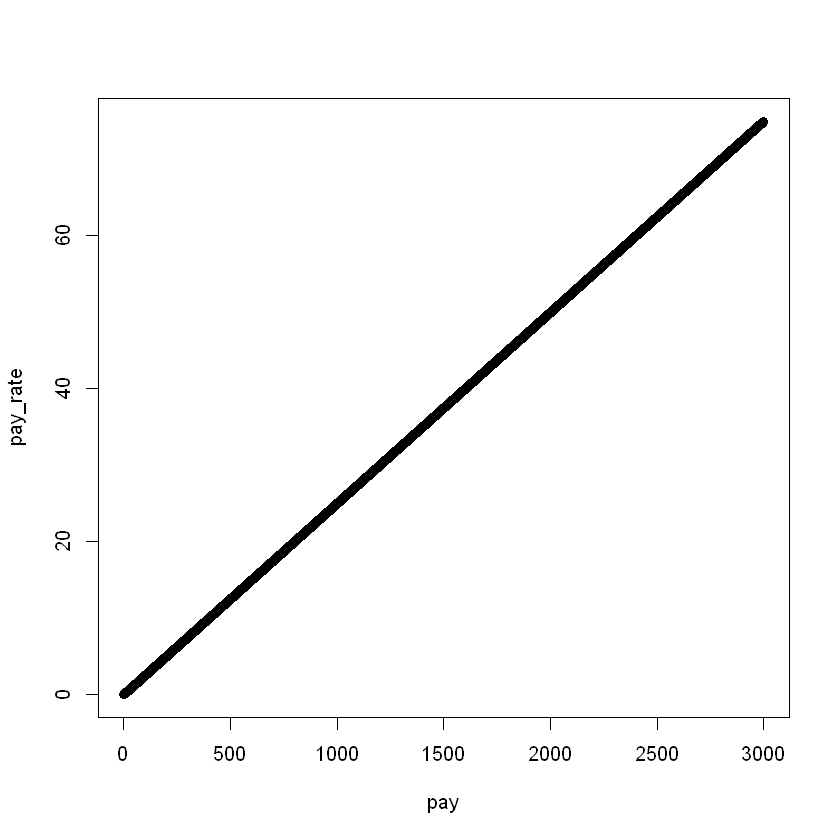

In [1]:
pay  <- seq(0, 3000, 1)
hrs  <- 40
pay_rate  <- pay/hrs
head(pay_rate, 20)
plot(y = pay_rate, x = pay)

The pay rate, given that $hours = 40$ is modeled by the equation $f(x) = \beta{x}$ where $\beta{} = .025 \text{ USD}$ (2.5 cents). Therefore, the pay rate of people who make more money will always be higher than those who make less money.

For increased accuracy, transforming the equation is required.

Otherwise, a way to measure inequality is the degree to which the average pay rate of a given group differs from the line of "ideal pay rate" versus that of other groups.

# Variables Considered

## Description
A list of every variable consulted during all stages of data analysis. 

## Purpose
I included this list to maximize transparency and reproducibility.

### Identifiers and Flags

`H_SEQ` Household Identifier

`PPPOS` Unique person identifier

  When used together,`H_SEQ` and `PPPOS` can be combined to create an identifier that is unique to a person's household and family. These variables are kept for future model fitting and testing etc.

`A_CIVLF` Civilian Labor Force 

  Select "1" to exclude all people in armed forces to reduce variance.

 * 0 = NIU
 * 1 = In universe

`PRERELG` Earning eligibility flag

  Defines a person as "Earnings-Eligible." (whether the total household earns below a certain amount of money. This can be calculated by taking PRERELG == 1 for the whole population (out of an abundance of caution) and determining the maximum value.)
  
 * 0 = No
 * 1 = Yes
  
### Employment

`A_FTLF` Full time labor force

 * 0 = NIU
 * 1 = FTLF

`PEMLR` Major Labor Force Category

  * 0 = NIO
  * 1 = Employed, at work
  * 2 = Employed, absent
  * 3 = Unemployed - on layoff
  * 4 = Unemployed - looking
  * 5 = Not in labor force - retired
  * 6 = Not in labor force - disabled
  * 7 = Not in labor force - other

`A_EXPLF` Experienced labor force

  Definition: has this person worked a job before? 0 = No, 1 = Yes

  * 0 = Not in experienced labor force
  * 1 = Employed
  * 2 = Unemployed

`A_PAYABS` Pay for time off

 * 0 = Not in universe/children and Armed Forces
 * 1 = Yes
 * 2 = No
 * 3 = Self-employed

`PRDISC` Discouraged worker

 * 0 = NIU
 * 1 = Discouraged worker
 * 2 = Conditionally interested
 * 3 = Not available

`A_HRS1` Hours worked last week at all jobs

 * -1 = Not in universe
 * 00 = Children and Armed Forces
 * 01-99 = Number of hr

`PEHRUSLT` Hours worked last week

  Note: Measure added after Hypothesis 2.

 * -4 = Hours vary
 * -1 = NIU - adult civilian
 * 000 = NIU - children or Armed Forces or no hours
 * 1-198 = # of hours

`A_GRSWK` Gross Weekly pay

  The amount an individual makes at one of their jobs (ASEC dictionary phrasing: "this job") prior to deductions.

  Note: Measure added after Hypothesis 2.
  
 * 0000 = NIU/Children or armed forces
 * 0001-2885 = Dollar amount
  
`PRUNTYPE` On the job, is X covered by a union association/contract?
 * 0 = Not in universe or children and Armed Forces
 * 1 = Yes
 * 2 = No
  
`A_UNCOV` On the job, is X covered by a union association/contract?
 * 0 = Not in universe or children and Armed Forces
 * 1 = Yes
 * 2 = No
  
### Poor Job Outcome

`PRUNTYPE` Reason for unemployment
  
  * 0 = NIU
  * 1 = Job loser/on layoff
  * 2 = Other job loser
  * 3 = Temporary job ended
  * 4 = Job leaver
  * 5 = Re-entrant
  * 6 = New-entran

`PRDISC`
  
  Discouraged worker code
  
 * 0 = NIU
 * 1 = Discouraged worker
 * 2 = Conditionally interested
 * 3 = Not available

### Demographic characteristics

`A_HGA`

  Highest Level of Education Achieved
  
 * 0 = Children
 * 31 = Less than 1st grade
 * 32 = 1st,2nd,3rd,or 4th grade
 * 33 = 5th or 6th grade
 * 34 = 7th and 8th grade
 * 35 = 9th grade
 * 36 = 10th grade
 * 37 = 11th grade
 * 38 = 12th grade no diploma
 * 39 = High school graduate - high school diploma or
  equivalent
 * 40 = Some college but no degree
 * 41 = Associate degree in college - occupation/vocation
  program
 * 42 = Associate degree in college - academic program
 * 43 = Bachelor's degree (for example: BA,AB,BS)
 * 44 = Master's degree (for example:
  MA,MS,MENG,MED,MSW, MBA)
 * 45 = Professional school degree (for example:
  MD,DDS,DVM,LLB,JD)
 * 46 = Doctorate degree (for example: PHD,EDD)

`PRDTRACE` Race

  Kept for potential data visualization applications
  
 * 01 = White only
 * 02 = Black only
 * 03 = American Indian, Alaskan Native only (AI)
 * 04 = Asian only
 * 05 = Hawaiian/Pacific Islander only (HP)
 * 06 = White-Black
 * 07 = White-AI
 * 08 = White-Asian
 * 09 = White-HP
 * 10 = Black-AI
 * 11 = Black-Asian
 * 12 = Black-HP
 * 13 = AI-Asian
 * 14 = AI-HP
 * 15 = Asian-HP
 * 16 = White-Black-AI
 * 17 = White-Black-Asian
 * 18 = White-Black-HP
 * 19 = White-AI-Asian
 * 20 = White-AI-HP
 * 21 = White-Asian-HP
 * 22 = Black-AI-Asian
 * 23 = White-Black-AI-Asian
 * 24 = White-AI-Asian-HP
 * 25 = Other 3 race comb.
 * 26 = Other 4 or 5 race comb.

# Important numeric constants

- Seed: 666

In [1]:
#SETTING SEED
set.seed(666) #Set seed at the beginning of the notebook, once.

In [2]:
# SET INITIAL WORKING DIRECTORY
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/March 2022 CPS Data")

In [3]:
# LOAD DATA
# family  <- read.csv("ffpub22.csv")
person  <- read.csv("pppub22.csv")

In [4]:
dim(person)
#n_fraction  <- (nrow(person))/10
pp_noisy  <- person[sample(nrow(person), 5000), ]
#person_part_time  <- person_part_time[sample(nrow(person_part_time), 1000), ]

[1] 152732    832

In [5]:
dim(pp_noisy)

[1] 5000  832

In [6]:
#LOAD LIBRARIES

#install.packages("tidyverse")
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Initial Data Cleaning

The initial dataset has been optimized to store data in a wide table format. The initial dataset has a *p* of ~8,600: too many variables to reasonably model together, not that anyone should be interested in such a fool's errand to begin with.

Many of the variables in this dataset have categorical values that denote exclusion from that variable's universe. It is important to consider this.

## Filter out children, armed forces

Children and armed forces add additional unwanted variance to an already highly complex dataset. The scope of these analyses is to consider the impact primarily on the labor force, so these variables were filtered out of the dataset.

## Filter out people who are not earnings-eligible

An additional filter to ensure that we only have earnings-eligible people in our dataset. Through applying this filter, we select wage-earners only, which is our population of interest. The documentation of how this filter was determined is difficult to find and obtuse, so I'm relying on the statisticians at the U.S. Department of Labor to have appropriately classified wage earners into this variable.

## Filter out adult civilians, varying work hours

This filter removes adult civilians who do not work, as well as people with varying work hours, as they add additional variance to our dataset and are not our population of interest.

In [7]:
# No longer needed once you write the data frame to .csv

# Filter out children, armed forces
person_no_children_or_armed_forces  <- person %>%
    filter(A_CIVLF != 0) #

dim(person_no_children_or_armed_forces)

# Filter out people who are not earnings-eligible
person_primary_income_eligibility  <- person_no_children_or_armed_forces %>%
    filter(PRERELG != 0000)

dim(person_primary_income_eligibility)

# Filter out adult civilians, varying work hours, no hours
person_labor_hours  <- person_primary_income_eligibility %>%
    filter(PEHRUSLT != -4,
          PEHRUSLT != -1,
          PEHRUSLT != 000) #children/armed forces/no hours

dim(person_labor_hours)

#write.csv(person_no_children_or_armed_forces, "C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/no_children_or_armed_forces_pppub22.csv", row.names=FALSE)

# The new data.frame was written to a .csv file to reduce load times, as we will now be pulling directly from the file, 
# since there is no situation in which we would want or need this filter to be reversed.

# The long-ass name was chosen in case we need to add other modifications later. The purpose of this is largely also
# to reduce load time, since the inital .csv file, pppub22.csv, is a whopping 288,744 KB. By contrast,
# the filtered version is 141,092 KB. 

# This filter decreases the load size (in KB) by a factor of 2.046. (see cell below) Not bad, huh?

[1] 73863   832

[1] 15941   832

[1] 15134   832

In [8]:
288744/141092 # Division

[1] 2.046494

# Data Visualisations for Cleaning

Gross job income by hours worked (per week)

In [9]:
# FUNCTIONALIZE ggplot2 geom_point

x_y_geom_point  <- function(df, x, y, xlab, ylab, title) {
    
    gg  <- ggplot(data = df, aes(x, y)) +
        geom_point() +
        labs(y = ylab, x = xlab, title = title)
    
    return(gg)
} 

# FUNCTION INPUTS

# x_y_geom_point: this function takes x and y and plots a geom_point with them.

# df = a data.frame
# y = a data.frame vector
# x = a data.frame vector
# ylab = a string, y-axis label
# xlab = a string, x-axis label
# title = a string, title label

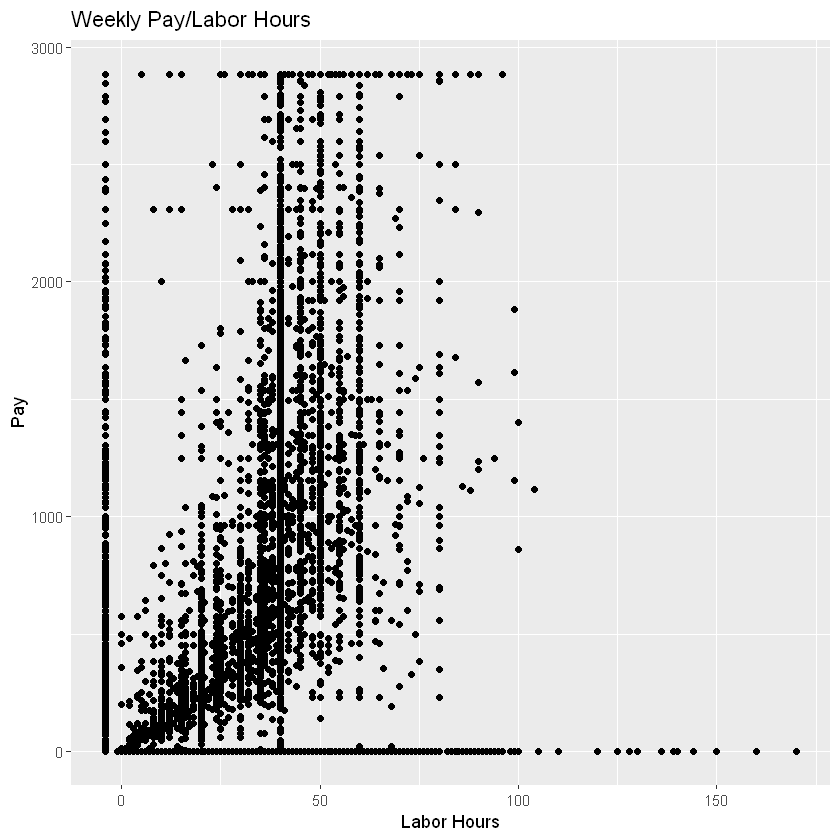

In [10]:
# PRIOR FILTER: None
# ADDED FILTER: children and military, {v != 0000}, let v = variable

# PRIORS
gross_weekly  <- person_no_children_or_armed_forces$A_GRSWK
hours_weekly  <- person_no_children_or_armed_forces$PEHRUSLT

# FUNCTION CALL
x_y_geom_point(person_no_children_or_armed_forces, hours_weekly, gross_weekly,
               "Labor Hours", "Pay", "Weekly Pay/Labor Hours")

# Leftoff Note: Circle back to the data visualisation lecture to get a better idea of what to do.
# Leftoff Note 2: Run tests to determine data skew (what distribution does the data have? Is it normal? Is it right-skewed? Is it something else?)

# Easy prediction 1: part-timers differ systematically from full-time employees in regards to [what?].

# Leftoff Note 5/24/23 12:28 PM: It looks like how much people work/week is systematically related to how many hours they work, and fits within predefined ranges (e.g. 30-hour work week, 40-hour work week, etc.)

Based on these visualisations, it looks like we have more cleaning to do.

- Labor hours: Remove negative value (NIU probably)
- Gross pay: Remove 0 value. Uninformative, absurd values. (NIU probably)

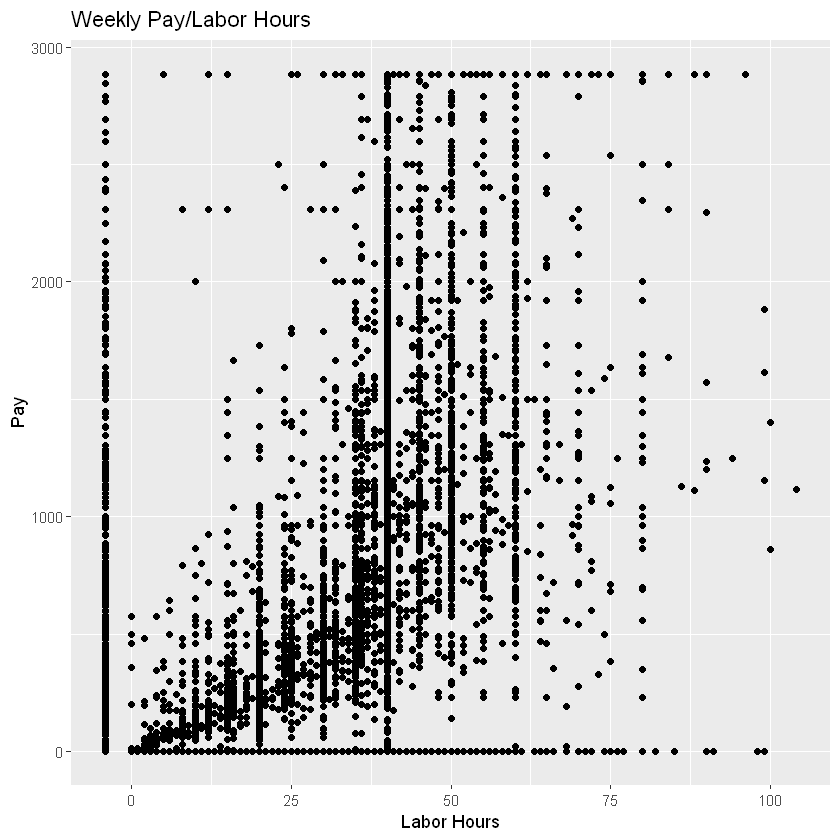

In [11]:
# PRIOR FILTER: children and armed forces 
# ADDED FILTER: primary income eligibility {v != 0}, let v = variable

# PRIORS
gross_weekly  <- person_primary_income_eligibility$A_GRSWK
hours_weekly  <- person_primary_income_eligibility$PEHRUSLT

# FUNCTION CALL
x_y_geom_point(person_primary_income_eligibility, hours_weekly, gross_weekly,
               "Labor Hours", "Pay", "Weekly Pay/Labor Hours")

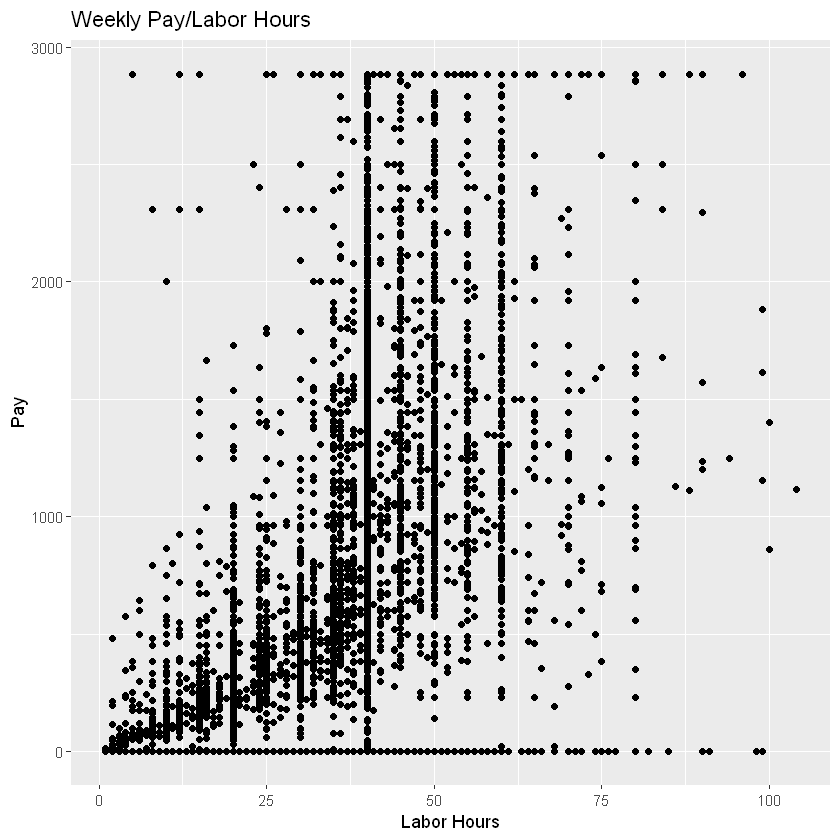

In [12]:
# PRIOR FILTERS: NO children and armed forces, ONLY primary income eligibility 
# ADDED FILTER: labor hours {v != -4, -1, 000}

# PRIORS
gross_weekly  <- person_labor_hours$A_GRSWK
hours_weekly  <- person_labor_hours$PEHRUSLT

# FUNCTION CALL
x_y_geom_point(person_labor_hours, hours_weekly, gross_weekly,
               "Labor Hours", "Pay", "Weekly Pay/Labor Hours")

In [13]:
dim(person_labor_hours)
min(person_labor_hours$A_GRSWK)
min(person_labor_hours$PEHRUSLT) # minimum labor hours for dataset = 10

[1] 15134   832

[1] 0

[1] 1

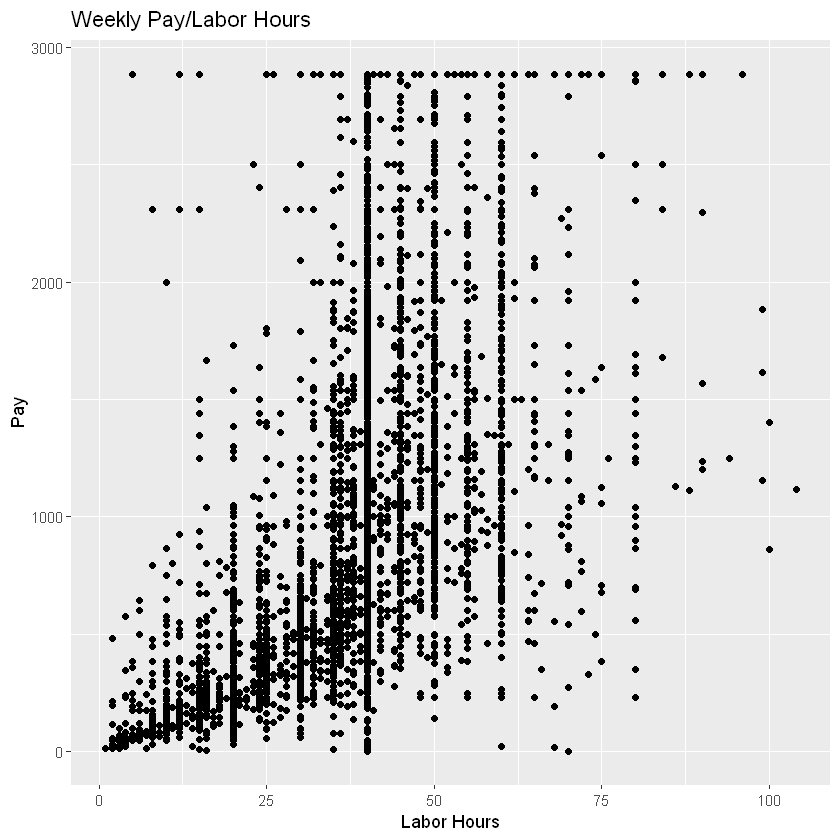

In [14]:
# PRIOR FILTERS: NO children and armed forces, ONLY primary income eligibility, NEITHER varied work hours nor NIU adult civilians 
# ADDED FILTER: ONLY income > 0

pp_income_over_0  <- person_labor_hours %>% # pp = person dataset, income_over_0 = the last filter applied
    filter(A_GRSWK > 0)

# PRIORS
gross_weekly  <- pp_income_over_0$A_GRSWK
hours_weekly  <- pp_income_over_0$PEHRUSLT

# FUNCTION CALL
x_y_geom_point(pp_income_over_0, hours_weekly, gross_weekly,
               "Labor Hours", "Pay", "Weekly Pay/Labor Hours")

In [142]:
dim(person_labor_hours)
dim(pp_income_over_0)
min(gross_weekly)

[1] 15134   832

[1] 10168   832

[1] 1

In [16]:
# WRITE REDEFINED DATA FRAME TO .csv
write.csv(pp_income_over_0, "C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/income_over_0_pppub22.csv", row.names=FALSE)

# OVER HERE CUNT

# YES YOU

# RUN THE REST OF THE CODE FROM HERE TO SAVE TIME

In [17]:
# LOAD PACKAGES

# Package names
packages <- c("tidyverse", "reshape2")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [18]:
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/March 2022 CPS Data")
household  <- read.csv("hhpub22.csv")

In [19]:
#REDEFINE WORKING DIRECTORY
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data") # Redefine working directory

In [20]:
# LOAD REDEFINED DATA FRAME
person  <- read.csv("income_over_0_pppub22.csv")

# Introductory data visualisations

## Correlation Tables

To identify potentially modelable correlations, 9 variables were chosen upon the basis that they are indicators of labor force status that can be used as predictors and outcome variables.

In order to develop a sense for the data, several correlation tables were made to visualise and condense the data into tables including the strongest correlations, which were later analyzed in what became Hypothesis 2.

In [21]:
pp.job_qual <- person %>% 
    select(H_SEQ = PH_SEQ, PPPOS, A_CIVLF, PEMLR, A_EXPLF, A_PAYABS, PRDISC, PEHRUSLT, PRDTRACE, A_FTLF, A_UNCOV, A_UNMEM, A_GRSWK, A_HGA, A_SEX)

hh  <- household %>% #establishing household variables
    select(H_SEQ, HTOTVAL, H_NUMPER)

#cor.jobqual
names(pp.job_qual)
names(hh)
#hhpp.dat <- inner_join(pp.job_qual, hh, by = c("H_SEQ"))

[1] "H_SEQ"    "PPPOS"    "A_CIVLF"  "PEMLR"    "A_EXPLF"  "A_PAYABS"
 [7] "PRDISC"   "PEHRUSLT" "PRDTRACE" "A_FTLF"   "A_UNCOV"  "A_UNMEM" 
[13] "A_GRSWK"  "A_HGA"    "A_SEX"

[1] "H_SEQ"    "HTOTVAL"  "H_NUMPER"

In [22]:
# FUNCTIONALIZED CORRELATION TABLE

# PREREQUISITES:
#cor.jobqual <- cor(pp.job_qual) #take data.frame, return cor (correlation matrix)
melt.cor.jobqual <- melt(cor(pp.job_qual)) # take cor, return melted cor

# FUNCTION:
#Functionalizing correlation table to save time and space later
quick_correlation_table  <- function(melted_df, title) {

    gg <- ggplot(data = melted_df, aes(x = Var1, y = Var2, fill = value)) +
      geom_tile(color = "white") +
      geom_text( size = 4, color = "black", aes(label = round(value, digits = 2))) +
      scale_fill_gradient2(low = "blue", high = "red", limit = c(-1,1)) +
      ggtitle(title) +
      theme_minimal()

    gg <- gg + theme(
      plot.title = element_text(color="black", size=14)
        )
    
    return(gg)
    }
# FUNCTION CALL
#quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

Warning message in cor(pp.job_qual):
"the standard deviation is zero"


# Recode to match heuristics

### Applying full time/part-time labor force split
In the preceding section, I demonstrated that there is a systematic difference between the pay rates of part-time and full-time workers.

At the time of writing, I have no idea what the -0.04 correlation between A_FTLF and A_GRSWK means. That's a problem, isn't it? To elucidate my understanding, it's time to apply one of the aforementioned solutions to the systematic difference between the pay rates of full-time and part-time workers: splitting them into two T/F sets.

In [23]:
print("dim pre")
print(dim(pp.job_qual))

pp.job_qual  <- pp.job_qual %>% 
    mutate(full_time = A_FTLF,
          part_time = A_FTLF)

#pp.job_qual  <- pp.job_qual %>% 
#    mutate(part_time = replace(part_time, part_time == 0, 666))

pp.job_qual  <- pp.job_qual %>% 
    mutate(part_time = replace(part_time, part_time == 0, 666), #666 = placeholder value
           part_time = replace(part_time, part_time == 1, 0), #replace 1 with 0
          part_time = replace(part_time, part_time == 666, 1)) # replace placeholder value

#pp.job_qual <- pp.job_qual [1: ncol(pp.job_qual)-1 ]
print("dim post")
print(dim(pp.job_qual))
print(paste("|"))
print("full-time: first 10 values")
print(head(pp.job_qual$full_time, 10))
print("part-time: first 10 values") 
print(head(pp.job_qual$part_time, 10))


[1] "dim pre"
[1] 10168    15
[1] "dim post"
[1] 10168    17
[1] "|"
[1] "full-time: first 10 values"
 [1] 1 1 1 1 0 1 1 1 1 1
[1] "part-time: first 10 values"
 [1] 0 0 0 0 1 0 0 0 0 0


Warning message in cor(pp.job_qual):
"the standard deviation is zero"
Warning message:
"Removed 90 rows containing missing values (`geom_text()`)."


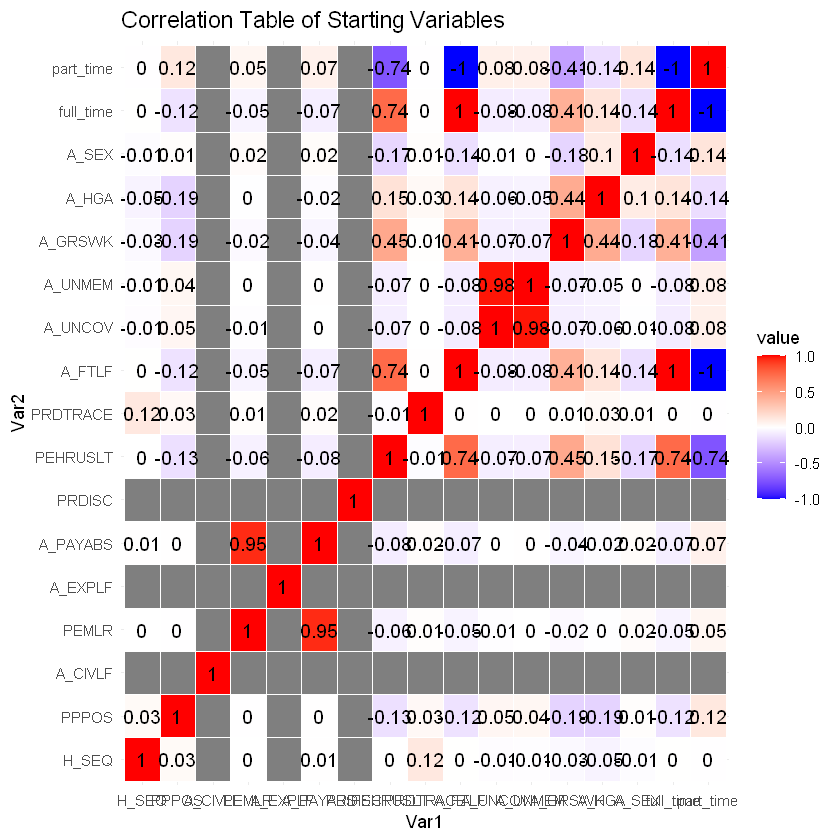

In [24]:
cor_obj  <- cor(pp.job_qual)

melt.cor.jobqual <- melt(cor_obj) # take cor, return melted cor
#melt.cor.jobqual  <-  na.omit(melt.cor.jobqual)

quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

In [25]:
# FILTER: REMOVE COLUMNS WITH NA CORRELATIONS IN DATASET/GRAY ROWS IN HEATMAP

names(pp.job_qual )

pp.job_qual  <- pp.job_qual %>%
    select(-c("PRDISC", "A_EXPLF", "A_CIVLF"))

names(pp.job_qual)

[1] "H_SEQ"     "PPPOS"     "A_CIVLF"   "PEMLR"     "A_EXPLF"   "A_PAYABS" 
 [7] "PRDISC"    "PEHRUSLT"  "PRDTRACE"  "A_FTLF"    "A_UNCOV"   "A_UNMEM"  
[13] "A_GRSWK"   "A_HGA"     "A_SEX"     "full_time" "part_time"

[1] "H_SEQ"     "PPPOS"     "PEMLR"     "A_PAYABS"  "PEHRUSLT"  "PRDTRACE" 
 [7] "A_FTLF"    "A_UNCOV"   "A_UNMEM"   "A_GRSWK"   "A_HGA"     "A_SEX"    
[13] "full_time" "part_time"

In [26]:
# FILTER: UNION MEMBERS VS. NON-UNION MEMBERS
union_df_b   <- pp.job_qual  %>% 
    filter(A_UNMEM != 0)

union_df   <- pp.job_qual  %>% 
    select(A_GRSWK, A_UNMEM) %>%
    filter(A_UNMEM != 0)

# Recode to match heuristics

## Union members recode

### Initial Code
`A_UNMEM`: 0:NIU, 1:Yes, 2:No.
### Recode
`A_UNMEM`: 0:No, 1:Yes
### Reasoning
 The union membership variable in the above correlation table is negatively correlated with income. That makes no sense, as we know that "Workers with union representation enjoy a significant pay premium compared to non-union workers." (United States Department of Labor). The answer lies in the codes. If yes is coded to a lesser value than no, then the correlation appears to be negative. However, when those codes are flipped, the reverse is true. Both are equally representative of reality. Crucially, the latter method allows us to leverage human heuristics instead of forcing human readers to pause and consider the coding.

,A_GRSWK,A_UNMEM
,<int>,<dbl>
1,923,1
2,1538,0
3,2885,0
4,1000,0
5,330,0
6,606,1


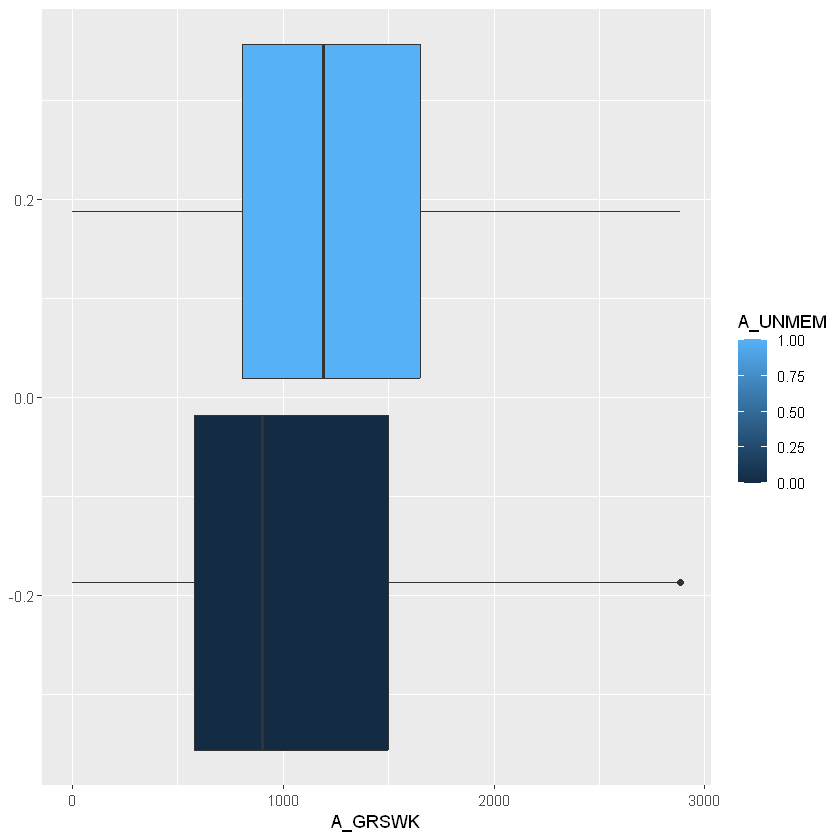

In [27]:
# Recode take 1
union_df  <- union_df  %>% 
    mutate(A_UNMEM = replace(A_UNMEM, A_UNMEM == 2, 0)) #flip position of "No" relative to "Yes." Relationship otherwise held constant.

head(union_df)

# Recode boxplot
gg  <- ggplot(data = union_df, aes(group = A_UNMEM, A_GRSWK))
gg + geom_boxplot(aes(fill = A_UNMEM))

In [28]:
cor_income_union  <- cor(union_df) # Confirmatory correlation output
cor_income_union[1,2] # Extract correlation between union membership and gross weekly income

[1] 0.07225735

This correlation shows us that the relationship between A_UNMEM and A_GRSWK has been equivalently flipped (same correlation but positive).

It's time to apply this filter to the full data.frame and see if it breaks it, which we will do by creating a correlation matrix of the data.frame with the new filter.

*Addendum: Code cell below has been temporarily commented out.*

In [29]:
# print("dim pre")
# print(dim(pp.job_qual))

# pp.job_qual  <- pp.job_qual %>% 
#     mutate(A_UNMEM = replace(A_UNMEM, A_UNMEM == 2, 0)) #flip position of "No" relative to "Yes." Relationship otherwise held constant.

# melt.cor.jobqual <- melt(cor(pp.job_qual)) # take cor, return melted cor
# quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

# print("|")
# print("dim post")
# print(dim(pp.job_qual))

Looks kosher. 

## Remove union coverage (redundant data)
`A_UNCOV` and `A_UNMEM` should most likely be included together in models; while the effect is similar, they are still different. The bottom line is whether one is covered by a union ass'n cotntract. Union membership implies coverage, while non-union membership does not, so coverage is accounted for separately. 

### Union Membership
#### Levels

* 0 - NIU
* 1 - Yes (Implies Union Coverage = Yes)
* 2 - No

### Union Coverage
#### Levels

* 0 - NIU
* 1 - Yes
* 2 - No

In [30]:
# pp.job_qual  <- pp.job_qual %>% #Can only be run once, unless you reload the prior data.
#     select(-c(A_UNCOV))

In [31]:
# # Check to make sure we've removed the variable
# head(pp.job_qual, 0)

## Absentee Pay Recode

### Initial Code
`A_PAYABS`: 0:NIU, 1:Yes, 2:No, 3:Self-employed.
### Recode
`A_PAYABS`: 0:NIU, 1:No, 2:Yes
### Reasoning
Heuristic-friendly. Excluding 0:NIU excludes everyone who is not currently absent from work. We don't want to do that because we not interested in solely analyzing this category.

The primary focus of this data analysis is to determine relationships between different classes of wage-earners, and self-employed people are not wage-earners. Therefore, they are be definitionally excluded, and the data must be updated to reflect this exclusion. 

We may be interested in revisiting this assumption and adding detail, however, currently, the self-employed people add unneeded noise. What do we do with noisy people? We remove them from the population.

If we really want to consider self-employed people, we can add them back in with a different recode/inherit the CPS ASEC code. 

In [32]:
dim(pp.job_qual) # dim check pre
head(pp.job_qual$A_PAYABS)
pp.job_qual  <- pp.job_qual %>% 
    filter(A_PAYABS != 3) # this filter is redundant, dims do not change after filter applied.

#pp.job_qual  <- as.factor(pp.job_qual$A_PAYABS)

#pp.job_qual <- pp.job_qual [1: ncol(pp.job_qual)-1 ]


dim(pp.job_qual) #dim check post

head(pp.job_qual)

[1] 10168    14

[1] 1 0 0 0 0 0

[1] 10168    14

,H_SEQ,PPPOS,PEMLR,A_PAYABS,PEHRUSLT,PRDTRACE,A_FTLF,A_UNCOV,A_UNMEM,A_GRSWK,A_HGA,A_SEX,full_time,part_time
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,5,42,2,1,40,1,1,0,1,923,43,2,1,0
2,9,41,1,0,55,1,1,2,2,1538,44,2,1,0
3,9,42,1,0,50,1,1,2,2,2885,42,1,1,0
4,77,41,1,0,50,1,1,2,2,1000,45,2,1,0
5,77,42,1,0,20,1,0,2,2,330,40,1,0,1
6,97,41,1,0,50,1,1,0,1,606,43,2,1,0


Hilariously, it appears that we have already excluded self-employed people! (based on the fact that the dimensions of the data are identical pre and post-filter, see output above) 

## Major Labor Force Recode

Filtering variable is redundant. Only included values in PEMLR (major labor force recode variable) are 1 and 2 (with our previously-applied filters).

This data will not be recoded; values are inherently categorical, and I do not see how recoding it would change our meaningful interpretation of the data. The correlations for this variable will require additional explanation & some work from the reader. I am okay with that, because I have already made it easier for them through heuristic-friendly organization, but here I make an exception to the rule.

In [33]:
dim(pp.job_qual)

#c(0, 3, 4, 5, 6, 7)

pp.job_qual  <- pp.job_qual %>%
    filter(PEMLR != c(0, 3),
          PEMLR != c(4, 5),
          PEMLR != c(6, 7))     # I would have just looked at the levels of the variables but
                                # levels() is returning null - cause duh it's not categorical dummy

dim(pp.job_qual)

[1] 10168    14

[1] 10168    14

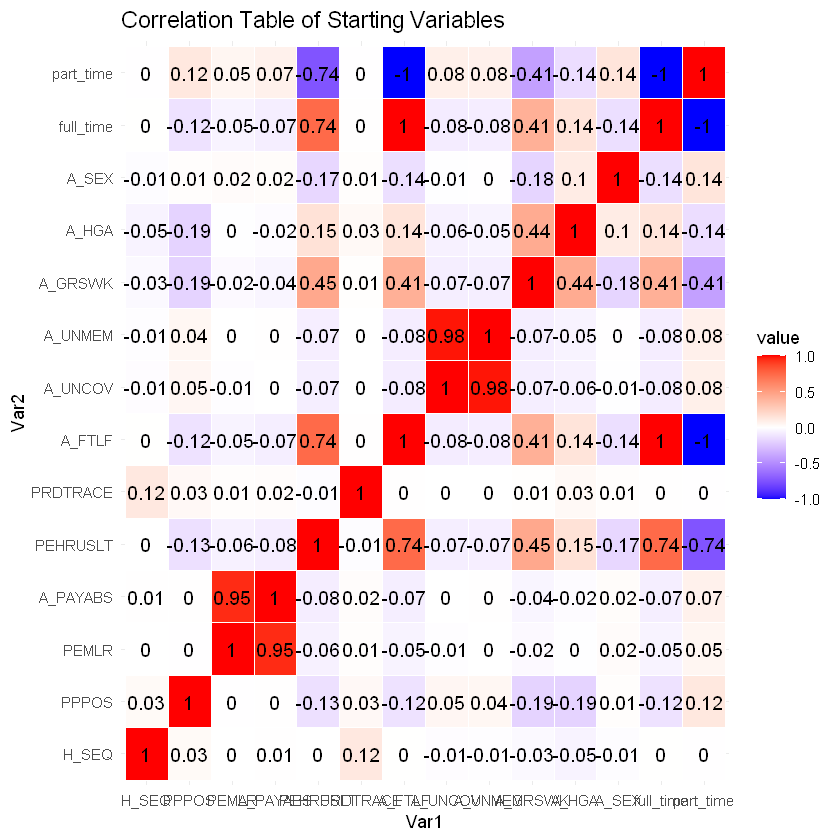

In [34]:
melt.cor.jobqual <- melt(cor(pp.job_qual)) # take cor, return melted cor
quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

In [35]:
# RENAMING VARIABLES

pp.job_qual <- pp.job_qual %>% 
        rename("income_week" = "A_GRSWK",
               "union_member" = "A_UNMEM",
               "union_coverage" = "A_UNCOV",
               "full_time_flag" = "A_FTLF",
              "hours_week" = "PEHRUSLT",
              "paid_abscence" = "A_PAYABS",
              "labor_code" = "PEMLR",
              "gender_binary" = "A_SEX",
              "education_level" = "A_HGA",
              "race" = "PRDTRACE")


An important step for our dataset is telling R which variables are categorical and which are quantitative, which can be done by using as.factor().

In [36]:
# a brief survey.

summary_pre_factor  <- summary(pp.job_qual)
summary_pre_factor

     H_SEQ           PPPOS        labor_code    paid_abscence    
 Min.   :    5   Min.   :41.0   Min.   :1.000   Min.   :0.00000  
 1st Qu.:22695   1st Qu.:41.0   1st Qu.:1.000   1st Qu.:0.00000  
 Median :44297   Median :41.0   Median :1.000   Median :0.00000  
 Mean   :44992   Mean   :41.7   Mean   :1.022   Mean   :0.03314  
 3rd Qu.:68291   3rd Qu.:42.0   3rd Qu.:1.000   3rd Qu.:0.00000  
 Max.   :88866   Max.   :54.0   Max.   :2.000   Max.   :2.00000  
   hours_week          race        full_time_flag   union_coverage 
 Min.   :  1.00   Min.   : 1.000   Min.   :0.0000   Min.   :0.000  
 1st Qu.: 40.00   1st Qu.: 1.000   1st Qu.:1.0000   1st Qu.:2.000  
 Median : 40.00   Median : 1.000   Median :1.0000   Median :2.000  
 Mean   : 39.25   Mean   : 1.457   Mean   :0.8442   Mean   :1.791  
 3rd Qu.: 40.00   3rd Qu.: 1.000   3rd Qu.:1.0000   3rd Qu.:2.000  
 Max.   :104.00   Max.   :26.000   Max.   :1.0000   Max.   :2.000  
  union_member    income_week   education_level gender_binary 

In [37]:
# CODING FACTORS
dim(pp.job_qual)
pp.job_qual_2 <- pp.job_qual

col_names <- sapply(pp.job_qual_2, function(col) length(unique(col)) < 30)
pp.job_qual_2[ , col_names] <- lapply(pp.job_qual_2[ , col_names] , factor)
                    
summary(pp.job_qual_2)
dim(pp.job_qual_2)      

[1] 10168    14

     H_SEQ           PPPOS      labor_code paid_abscence   hours_week    
 Min.   :    5   41     :5240   1:9943     0:9943        Min.   :  1.00  
 1st Qu.:22695   42     :3530   2: 225     1: 113        1st Qu.: 40.00  
 Median :44297   43     : 906              2: 112        Median : 40.00  
 Mean   :44992   44     : 313                            Mean   : 39.25  
 3rd Qu.:68291   45     : 107                            3rd Qu.: 40.00  
 Max.   :88866   46     :  42                            Max.   :104.00  
                 (Other):  30                                            
      race      full_time_flag union_coverage union_member  income_week  
 1      :8133   0:1584         0: 998         1: 998       Min.   :   1  
 2      :1059   1:8584         1: 126         2:9170       1st Qu.: 600  
 4      : 625                  2:9044                      Median : 933  
 3      : 132                                              Mean   :1135  
 5      :  57                         

[1] 10168    14

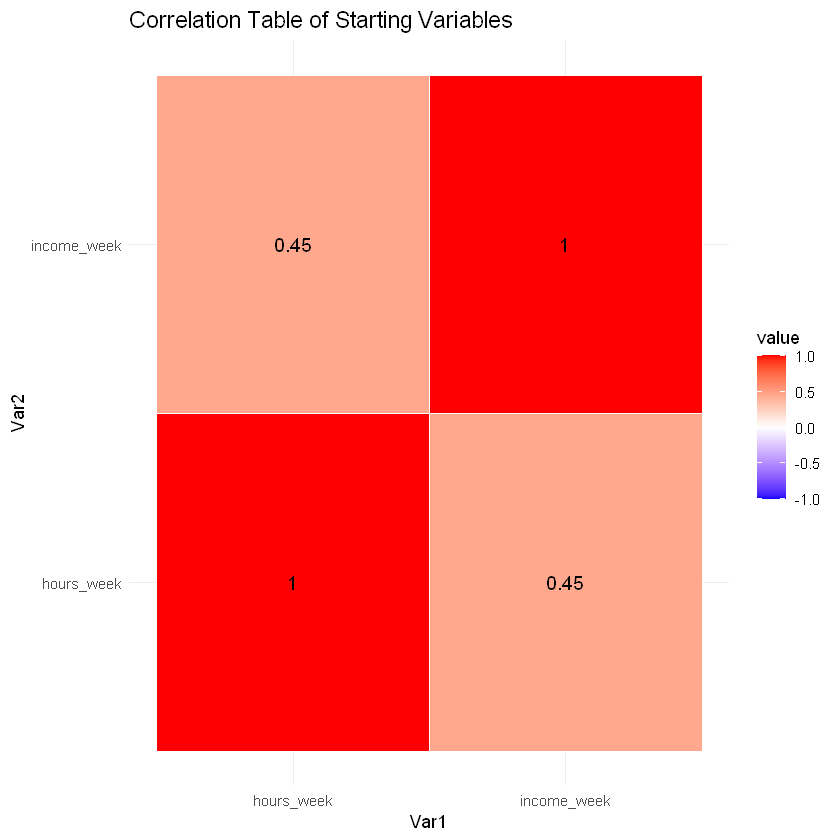

In [38]:
pp.for.cor  <- pp.job_qual_2 %>%
    select(hours_week, income_week)

melt.cor.jobqual <- melt(cor(pp.for.cor)) # take cor, return melted cor
quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

After removing the factors, we only have the correlation between income per week and hours worked per week (.45).

# Establishing Train and Test Sets

In [39]:
# Create your validation sets
train.inds=sample(1:nrow(pp.job_qual_2), 1000) #10/90 split into training and test sets
test= -(train.inds) #get test indices (not training indices)

train  <- pp.job_qual_2[train.inds,]
dim(train)

test  <- pp.job_qual_2[test,]
dim(test )

[1] 1000   14

[1] 9168   14

**Data Distribution Visualisation**

Gross Weekly Income

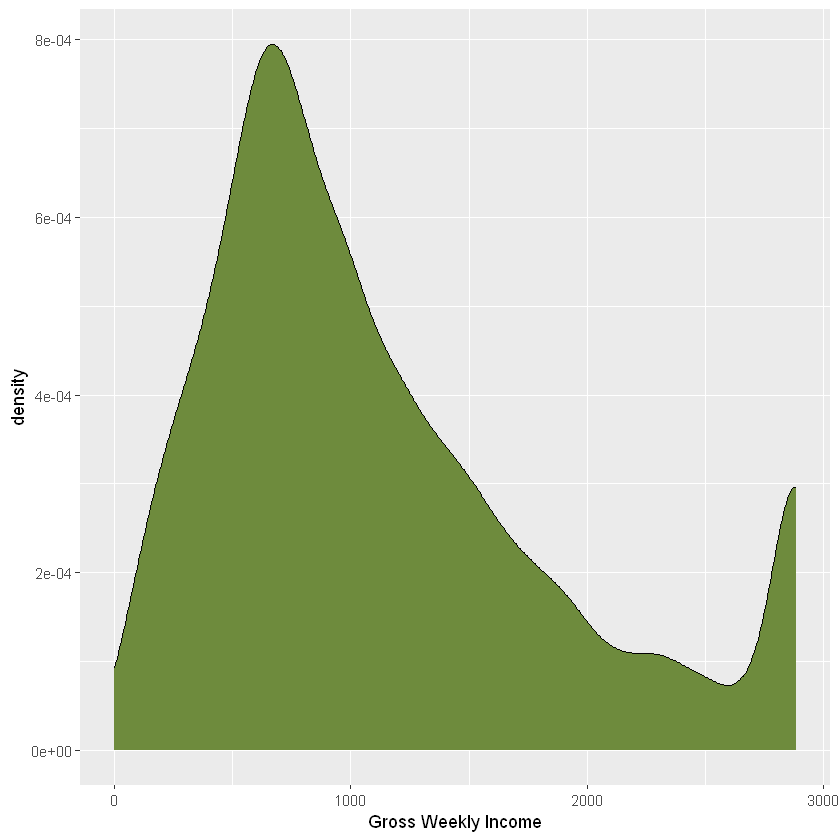

In [40]:
gg.distribution  <- ggplot (data = person, aes(A_GRSWK)) + labs(x = "Gross Weekly Income") 
gg.distribution + geom_density(fill = "darkolivegreen4")

**Data Distribution Visualisation**

Hours worked weekly

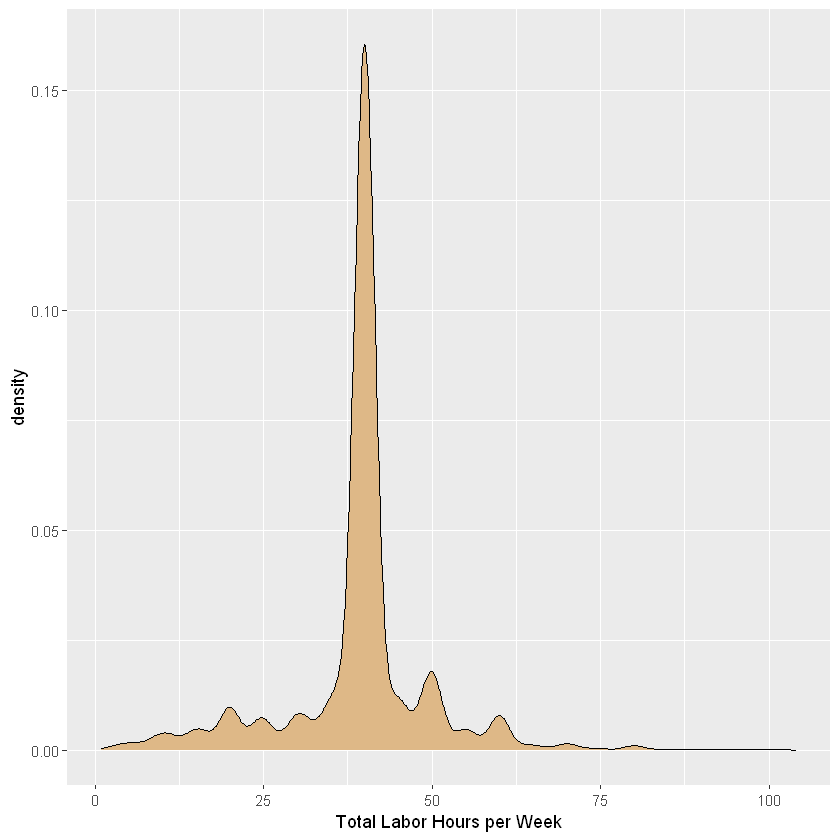

In [41]:
gg.distribution  <- ggplot (data = person, aes(PEHRUSLT)) + labs(x = "Total Labor Hours per Week") 
gg.distribution + geom_density(fill = "burlywood")

Hours appear to have a Gaussian distribution centered around x = 40, where x = total labor hours per week.

In [42]:
#Pre-DA mini-Hypothesis: I predict that part time workers differ systematically from full-time workers.
#I suspect this difference is primarily due to part-time workers working fewer hours.

pp_select_3vars  <- person %>%
    select(PEHRUSLT, A_GRSWK, A_FTLF)
    
#person_f1  <- person_f1 %>% filter(A_FTLF == A_FTLF[which(person_f1$A_FTLF>0)])


#person_f1$PEHRUSLT[which(person_f1$PEHRUSLT>0)]
#person_f1$A_FTLF#[which(person_f1$A_FTLF>0)]

head(pp_select_3vars)
#person_f1

glm_hrs_ftlf  <- glm(PEHRUSLT ~ A_GRSWK, data = pp_select_3vars, family = Gamma("inverse"))
summary(glm_hrs_ftlf) 

,PEHRUSLT,A_GRSWK,A_FTLF
,<int>,<int>,<int>
1,40,923,1
2,55,1538,1
3,50,2885,1
4,50,1000,1
5,20,330,0
6,50,606,1



Call:
glm(formula = PEHRUSLT ~ A_GRSWK, family = Gamma("inverse"), 
    data = pp_select_3vars)

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.002e-02  1.210e-04  248.00   <2e-16 ***
A_GRSWK     -3.701e-06  7.724e-08  -47.92   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.06555576)

    Null deviance: 1061.35  on 10167  degrees of freedom
Residual deviance:  921.69  on 10166  degrees of freedom
AIC: 78176

Number of Fisher Scoring iterations: 4


In [43]:
set.seed(666)

person_full_time  <- pp_select_3vars %>% 
    filter(A_FTLF != 0) # Exclude part time labor force

person_full_time  <- person_full_time[sample(nrow(person_full_time), 1000), ]


person_part_time  <- pp_select_3vars %>%
    filter(A_FTLF != 1) # Exclude full time labor force

person_part_time  <- person_part_time[sample(nrow(person_part_time), 1000), ]

#Use statesticle tests to compare them

In [44]:
# Check dims
person_full_time %>%
dim()

person_part_time %>%
dim()

[1] 1000    3

[1] 1000    3

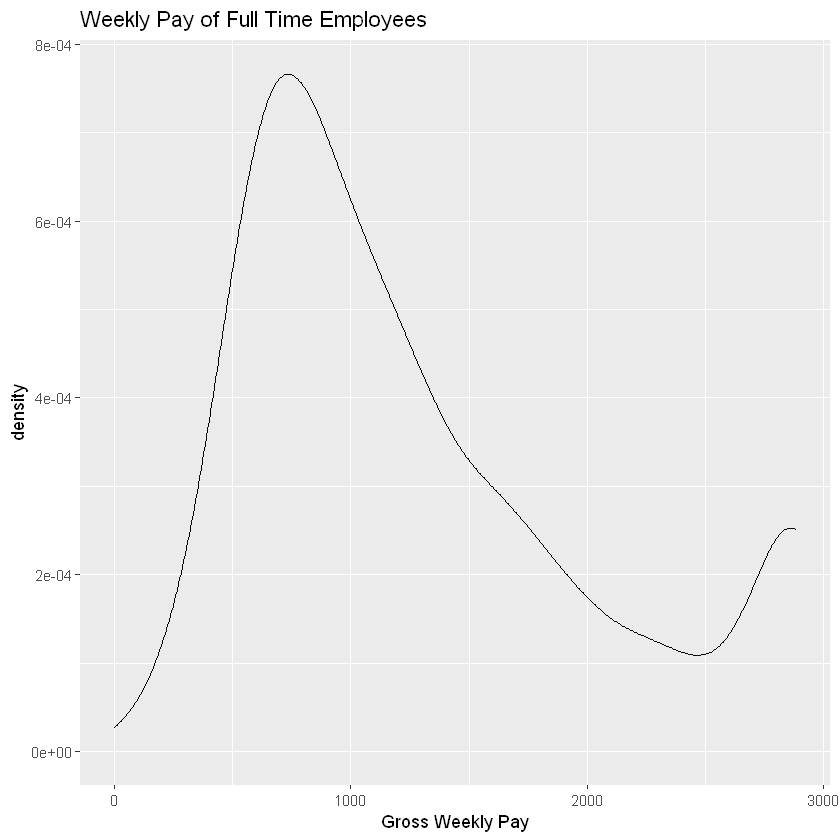

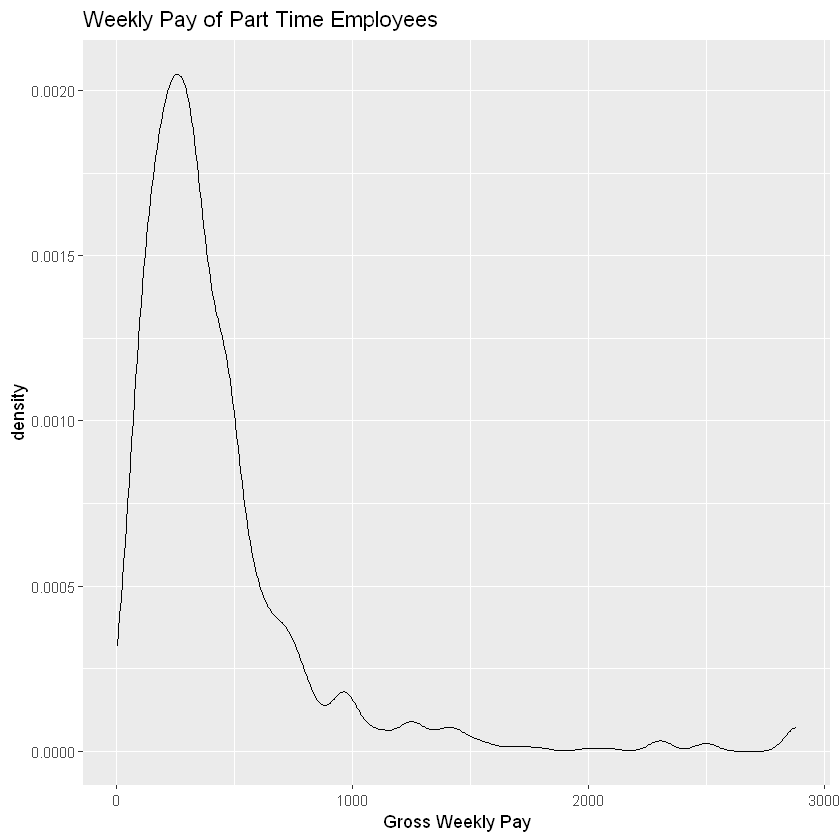

In [45]:
#Plotting train sets

gg_ft  <- ggplot(data = person_full_time, aes(A_GRSWK)) +
    geom_density() +
    labs(x = "Gross Weekly Pay", title = "Weekly Pay of Full Time Employees")

gg_ft


gg_pt  <- ggplot(data = person_part_time, aes(A_GRSWK)) +
    geom_density() +
    labs(x = "Gross Weekly Pay", title = "Weekly Pay of Part Time Employees")

gg_pt

In [46]:
full_time_gross_income = person_full_time$A_GRSWK
part_time_gross_income = person_part_time$A_GRSWK

#wilcox.test(full_time_gross_income, part_time_gross_income, alternative = "two.sided")
wilcox.test(full_time_gross_income, part_time_gross_income, alternative = "greater") #x, full time gross income, is > y, part time gross income


	Wilcoxon rank sum test with continuity correction

data:  full_time_gross_income and part_time_gross_income
W = 904227, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


## Data visualisation conclusions

### Full-time vs. part-time workers

Full-time workers appear to differ systematically from part-time workers. Upon this basis, I cocnclude that they should either:

1. Be analyzed separately
2. Models that control for their intercorrelation must be built

# Logistic Regression: Weekly Pay for Union/Non-Union Members

In order to run a logistic regression model (as I understand it), the outcome must be binarized (between 0 and 1). I am going to binarize the data by whether it falls above or below the median of income. I am choosing the median of income because the mean tends to skew the data towards outliers, and we have a noticeable right skew in our dataset.

,H_SEQ,PPPOS,labor_code,paid_abscence,hours_week,race,full_time_flag,union_coverage,union_member,income_week,education_level,gender_binary,full_time,part_time
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
1,5,42,2,1,40,1,1,0,1,923,43,2,1,0
2,9,41,1,0,55,1,1,2,2,1538,44,2,1,0
3,9,42,1,0,50,1,1,2,2,2885,42,1,1,0
4,77,41,1,0,50,1,1,2,2,1000,45,2,1,0
5,77,42,1,0,20,1,0,2,2,330,40,1,0,1
6,97,41,1,0,50,1,1,0,1,606,43,2,1,0
7,135,41,1,0,40,1,1,2,2,720,37,1,1,0
8,149,41,1,0,40,1,1,2,2,1090,43,2,1,0
9,171,41,1,0,36,1,1,2,2,1300,43,2,1,0


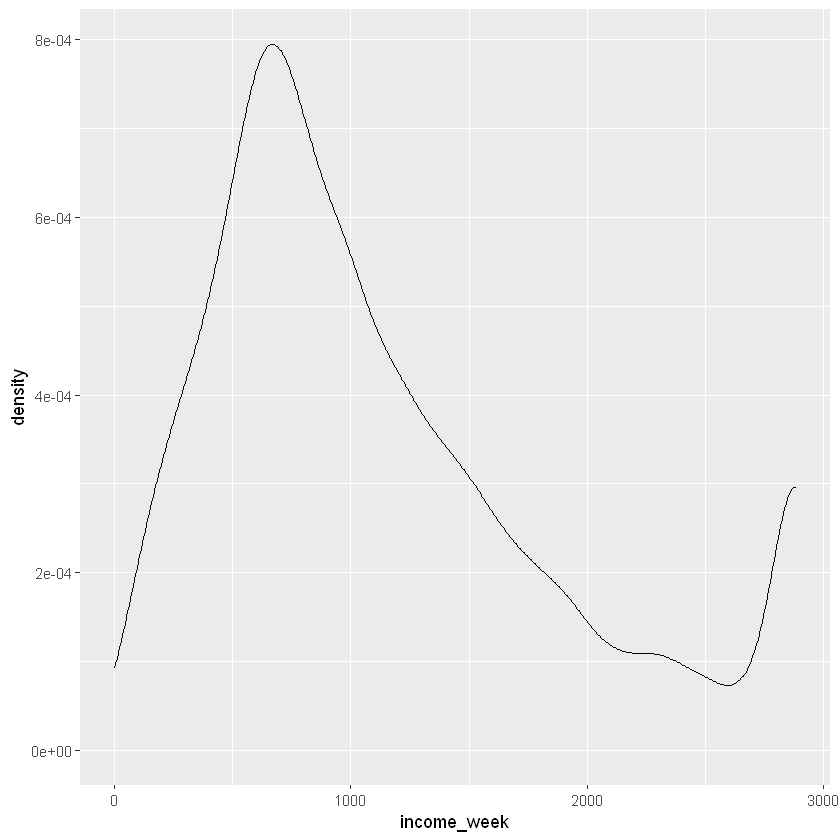

In [47]:
head(pp.job_qual_2, 10)

gg  <- ggplot(pp.job_qual_2, aes(x = income_week)) +
    geom_density()

gg

In [48]:
# Summary statistics

income  <- pp.job_qual_2$income_week
mean_income  <- mean(income)
mean_income

median_income  <- median(income)
median_income

sd_income  <- sd(income)
sd_income #pretty big-ass standard deviation; probably going to fuck up our estimates

[1] 1135.347

[1] 933

[1] 749.1858

In [49]:
# binarizing

union_data  <- train %>%
    mutate(above_median  = income_week > median_income)

union_data$above_median  <- as.factor(union_data$above_median)

#union_data$above_median  <- bin(union_data$above_median)

head(union_data)

summary(union_data)

#dim(union_data)

,H_SEQ,PPPOS,labor_code,paid_abscence,hours_week,race,full_time_flag,union_coverage,union_member,income_week,education_level,gender_binary,full_time,part_time,above_median
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
26,377,41,1,0,30,1,0,2,2,450,40,1,0,1,FALSE
3742,32708,42,1,0,40,1,1,0,1,1231,44,2,1,0,TRUE
9021,79747,43,1,0,40,1,1,0,1,939,40,1,1,0,TRUE
6600,58877,42,1,0,45,1,1,2,2,570,40,1,1,0,FALSE
1312,12920,41,1,0,40,1,1,2,2,1080,39,2,1,0,TRUE
914,8366,42,1,0,40,2,1,2,2,1096,43,2,1,0,TRUE


     H_SEQ           PPPOS     labor_code paid_abscence   hours_week   
 Min.   :   77   41     :532   1:975      0:975         Min.   : 2.00  
 1st Qu.:20285   42     :335   2: 25      1: 10         1st Qu.:40.00  
 Median :40172   43     : 87              2: 15         Median :40.00  
 Mean   :42810   44     : 31                            Mean   :39.07  
 3rd Qu.:66126   45     : 11                            3rd Qu.:40.00  
 Max.   :88766   46     :  2                            Max.   :84.00  
                 (Other):  2                                           
      race     full_time_flag union_coverage union_member  income_week  
 1      :792   0:166          0: 87          1: 87        Min.   :   1  
 2      :116   1:834          1: 11          2:913        1st Qu.: 600  
 4      : 50                  2:902                       Median : 923  
 3      : 21                                              Mean   :1115  
 6      :  5                                              3


Call:
glm(formula = above_median ~ union_member, family = "binomial", 
    data = union_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.9083     0.2369   3.834 0.000126 ***
union_member2  -1.0025     0.2460  -4.075  4.6e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1386.3  on 999  degrees of freedom
Residual deviance: 1368.0  on 998  degrees of freedom
AIC: 1372

Number of Fisher Scoring iterations: 4


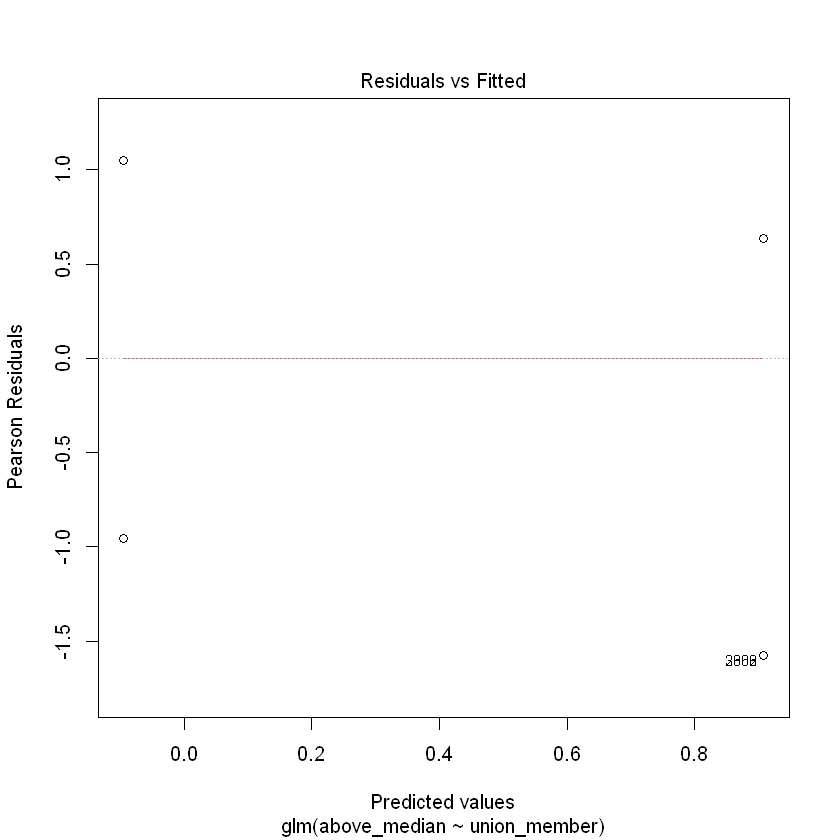

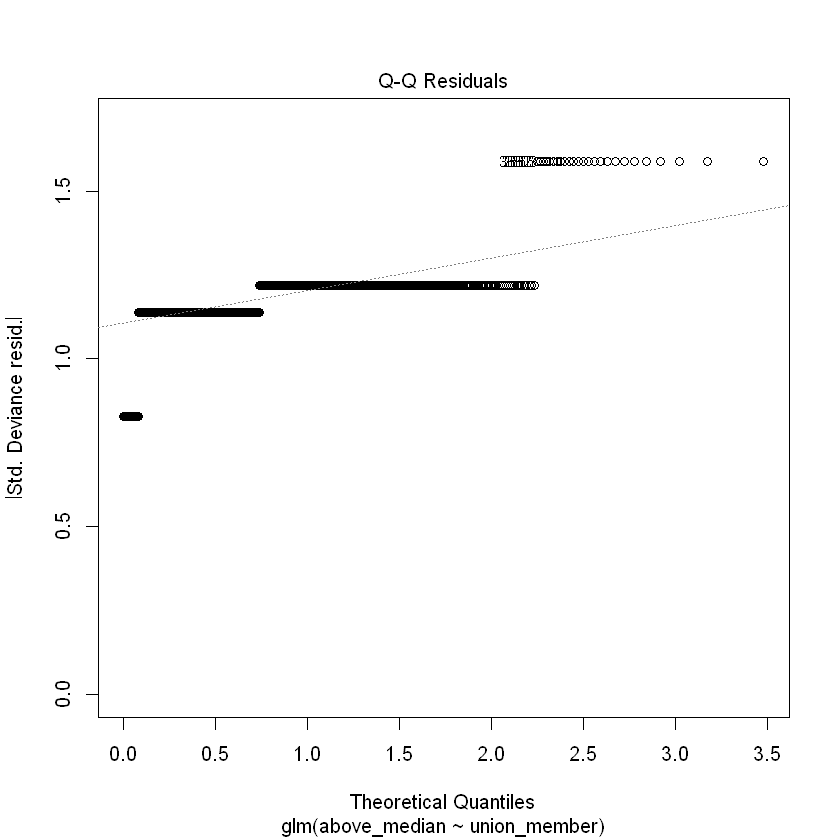

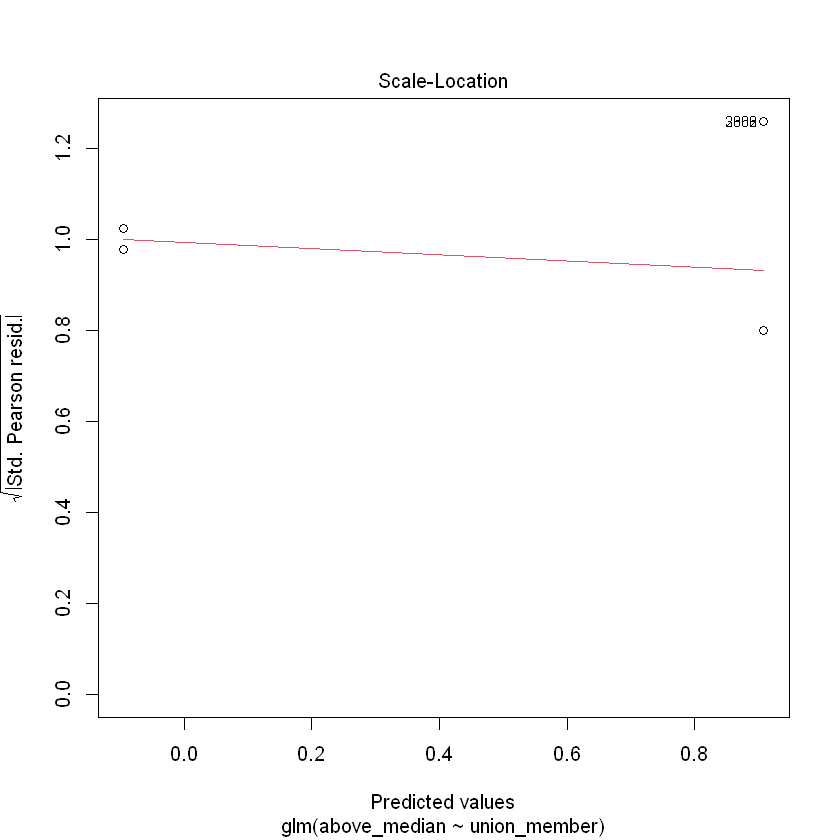

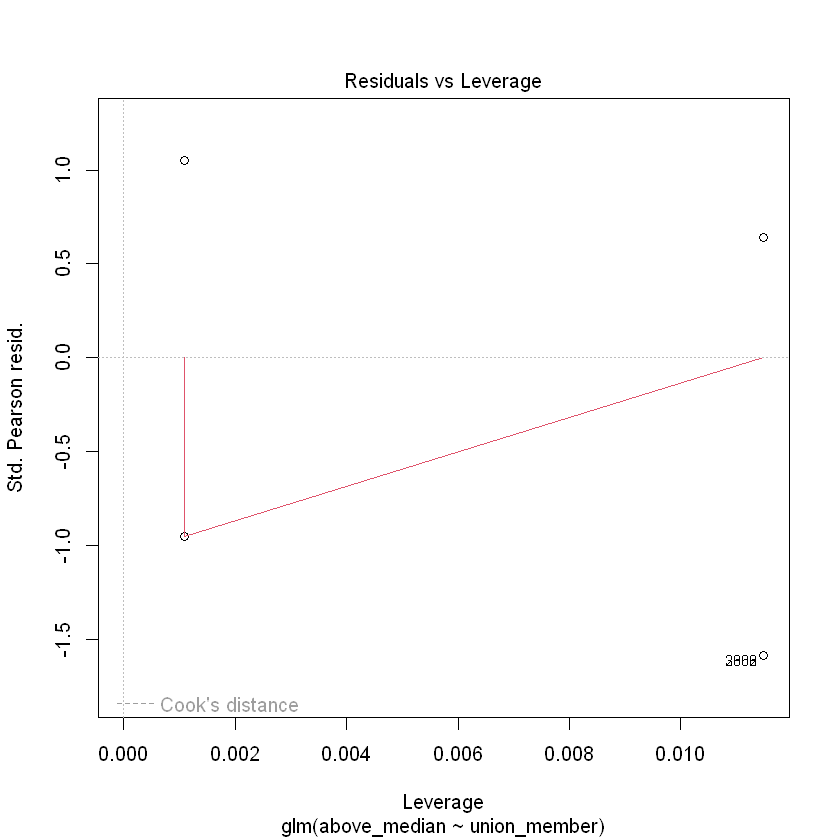

In [50]:
logit  <- glm(above_median ~ union_member, data = union_data, family = "binomial")
summary(logit)

plot(logit)

Union members are more likely to fall above the median of income than non-union members.

# Testing the model accuracy

Est. a consistent train/test dataset

In [51]:
glm_prob_df <- data.frame(predict(logit, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')
head(glm_prob_df)

,predicted_prob
,<dbl>
26,0.4764513
3742,0.7126437
9021,0.7126437
6600,0.4764513
1312,0.4764513
914,0.4764513


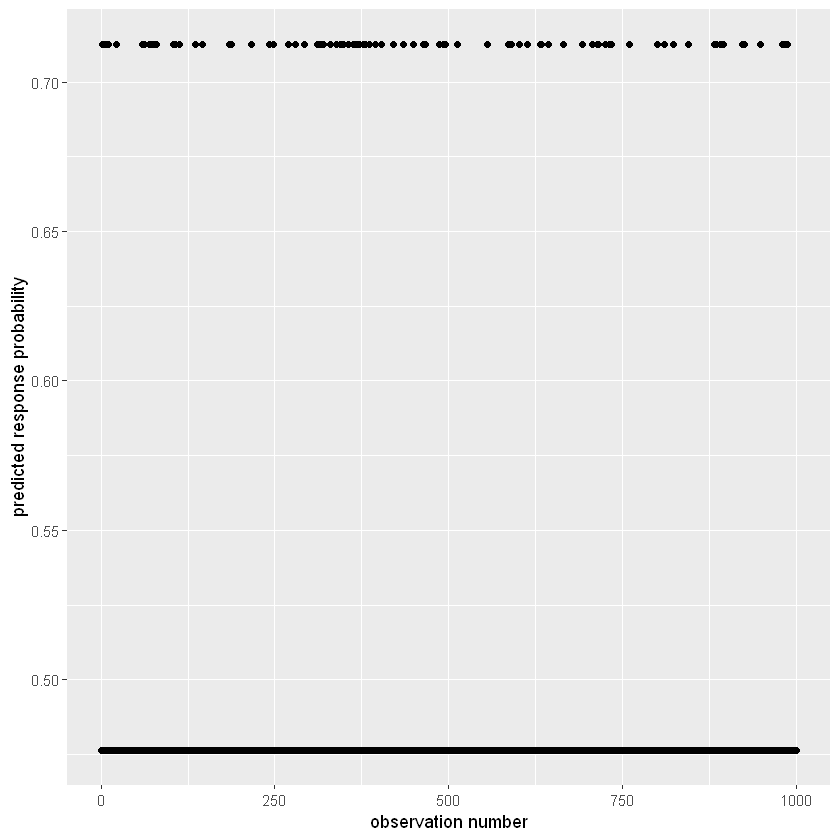

In [52]:
#get the observation number for plotting; ggplot does not infer this
num_observations = nrow(glm_prob_df)
glm_prob_df$index = seq(1, num_observations) 

ggplot(glm_prob_df, aes(index, predicted_prob)) + 
    geom_point() + xlab('observation number') + 
    ylab('predicted response probability') 

In [53]:
contrasts(union_data$above_median)

,TRUE
FALSE,0
TRUE,1


In [54]:
threshold = 0.50 #binarizing threshold 

# First make a list of "Downs"
glm_prob_df$predicted_binary=rep("Down", num_observations)

# Then use the probability output to label the up days.
# I.e., find the rows that have prob > threshold and cast as 'up'
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob > threshold]= "Up" 

# An alternative way: use if_else to label both at once
# if the prob is above the threshold, cast as "Up", otherwise cast as "Down"
glm_prob_df$predicted_binary <- if_else(glm_prob_df$predicted_prob > threshold,
                                       "Up", "Down")

# Now let's look at the prediction accuracy
confusion_df = data.frame(glm_prob_df$predicted_binary, union_data$above_median)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

         actual
predicted FALSE TRUE
     Down   478  435
     Up      25   62

In [55]:
mean(confusion_df$predicted == confusion_df$actual)

[1] 0

It looks like this model is not accurate. (0 accuracy).

# K-Nearest Neighbors Analysis

After the unfortunate failure of the above models to predict jack fucking shit, I supposed it would be a good idea to try a different model. Given the weird bullshit and spread-out distributions in the set, I figured I would use K-Nearest Neighbors, especially since the dataset is not controlling for complicating factors e.g. race, job, etc.

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "full_time_flag"  "union_coverage" 
 [9] "union_member"    "income_week"     "education_level" "gender_binary"  
[13] "full_time"       "part_time"

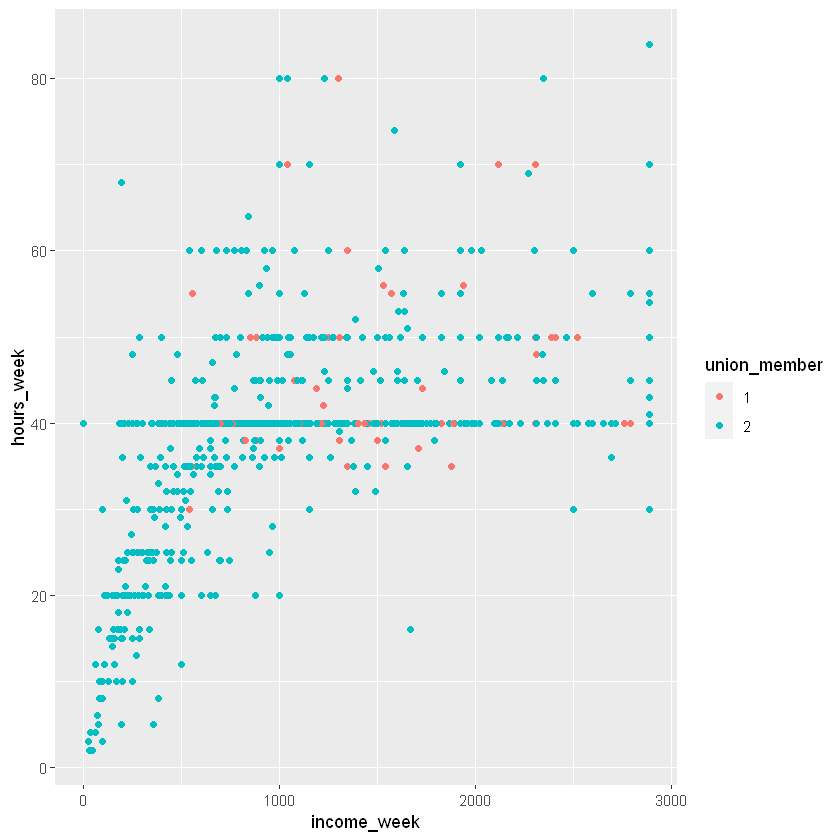

In [56]:
# train = train df
# test - test df

names(train)

gg  <- ggplot(train, aes(income_week, hours_week, color = union_member))
gg + geom_point()

In [57]:
library(class)

#training data pulls the "not test" rows
train.preds  <- cbind(train$hours_week, train$income_week)
train.spec  <- train$union_member

#train.preds <- cbind(dat$Petal.Length[-test.inds], dat$Sepal.Length[-test.inds])
#train.spec <- dat$Species[-test.inds]
#testing data pulls the test rows
test.preds <- cbind(test$hours_week, test$income_week)

#run knn
test.spec.knn <- knn(train.preds, test.preds, train.spec, k = 3)

#print first 10 test specifications
test.spec.knn[1:10]

[1] 2 2 2 2 2 2 2 2 2 2
Levels: 1 2

,H_SEQ,PPPOS,labor_code,paid_abscence,hours_week,race,full_time_flag,union_coverage,union_member,income_week,education_level,gender_binary,full_time,part_time,union_member_pred
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>
1,5,42,2,1,40,1,1,0,1,923,43,2,1,0,1
2,9,41,1,0,55,1,1,2,2,1538,44,2,1,0,2
3,9,42,1,0,50,1,1,2,2,2885,42,1,1,0,2
4,77,41,1,0,50,1,1,2,2,1000,45,2,1,0,2
6,97,41,1,0,50,1,1,0,1,606,43,2,1,0,1
7,135,41,1,0,40,1,1,2,2,720,37,1,1,0,2


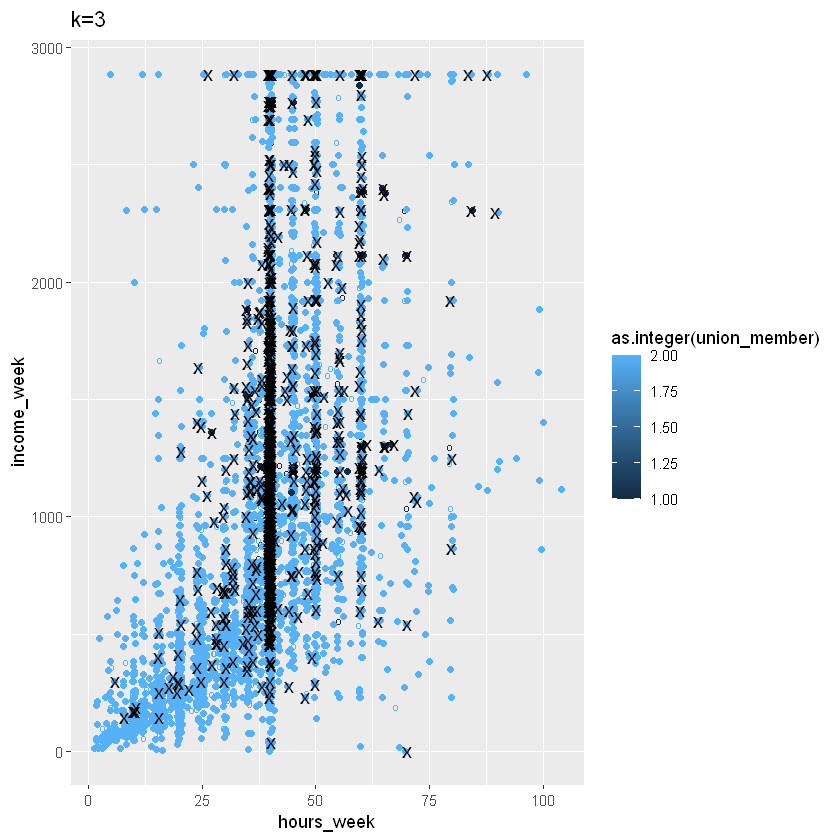

In [58]:
# new variable for each observation's predicted species. 
test$union_member_pred <- test$union_member

head(test)

# add the KNN predictions for test obs to dataset.
test$union_member_pred <- test.spec.knn

test$union_member_pred  <- as.integer(test$union_member_pred)

# in which cases does the observed Species equal the predicted?
test$KNN_correct <- test$union_member == test$union_member_pred

#summary(test)

# Plot
ggplot(train,aes(x=hours_week,y=income_week,col=as.integer(union_member))) + 
    # Base layer to show training points: 
    geom_jitter(size=2,shape="o") +
    # Next layer shows test points' KNN classifications:
     geom_jitter(data=test,
                aes(x=hours_week,y=income_week, col= union_member_pred)) +
    # draw "x" over wrong ones.     
    geom_jitter(data=test[which(!test$KNN_correct),],
               aes(x=hours_week,y=income_week),shape="x",col="black",size=4) + 
     ggtitle("k=3")

In [59]:
confusion_df <- data.frame(predicted = test.spec.knn, actual = test$union_member)
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    1    2
        1   18  105
        2  893 8152

[1] "---"
[1] "Accuracy: 0.891143106457243"


In [60]:
test.spec.knn.k10 <- knn(train.preds, test.preds, train.spec, k = 10)

# new variable for each observation's predicted species. 
test$union_member_pred <- test$union_member

# add the KNN predictions for test obs to dataset.
test$union_member_pred <- test.spec.knn.k10

test$union_member_pred  <- as.integer(test$union_member_pred)

confusion_df <- data.frame(predicted = test.spec.knn.k10, actual = test$union_member)
table(confusion_df)
print("---")
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted    1    2
        1    0    0
        2  911 8257

[1] "---"
[1] "Accuracy: 0.900632635253054"


# Revisiting Paid Abscence

Since so many of the people receiving absentee pay are NIU (they were not absent, therefore they could not have received absentee pay), but we are still interested in it as a job quality indicator, the time has come, my dear comrades, for the great sun to rise over the ranks of the labor force (satire) and reveal which piece of shit employers don't pay their employees for time off (not satire).

We will do that by removing 0 = NIU through a filter

In [61]:
head(pp.job_qual_2)

,H_SEQ,PPPOS,labor_code,paid_abscence,hours_week,race,full_time_flag,union_coverage,union_member,income_week,education_level,gender_binary,full_time,part_time
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
1,5,42,2,1,40,1,1,0,1,923,43,2,1,0
2,9,41,1,0,55,1,1,2,2,1538,44,2,1,0
3,9,42,1,0,50,1,1,2,2,2885,42,1,1,0
4,77,41,1,0,50,1,1,2,2,1000,45,2,1,0
5,77,42,1,0,20,1,0,2,2,330,40,1,0,1
6,97,41,1,0,50,1,1,0,1,606,43,2,1,0


In [62]:
# Prior filter: person dataset

paid_abscence_data  <- pp.job_qual_2 %>%
    filter(paid_abscence != 0)

paid_abscence_data$paid_abscence  <- as.factor(paid_abscence_data$paid_abscence)


In [63]:
dim(paid_abscence_data)
summary(paid_abscence_data)
#paid_abscence_data$paid_abscence

[1] 225  14

     H_SEQ           PPPOS     labor_code paid_abscence   hours_week  
 Min.   :    5   41     :115   1:  0      0:  0         Min.   : 2.0  
 1st Qu.:22763   42     : 79   2:225      1:113         1st Qu.:30.0  
 Median :47686   43     : 21              2:112         Median :40.0  
 Mean   :44870   44     :  9                            Mean   :35.1  
 3rd Qu.:66524   46     :  1                            3rd Qu.:40.0  
 Max.   :88860   45     :  0                            Max.   :90.0  
                 (Other):  0                                          
      race     full_time_flag union_coverage union_member  income_week  
 1      :174   0: 62          0: 23          1: 23        Min.   :  13  
 2      : 27   1:163          1:  7          2:202        1st Qu.: 410  
 4      : 11                  2:195                       Median : 810  
 3      :  5                                              Mean   :1018  
 5      :  3                                              3rd Qu.:1

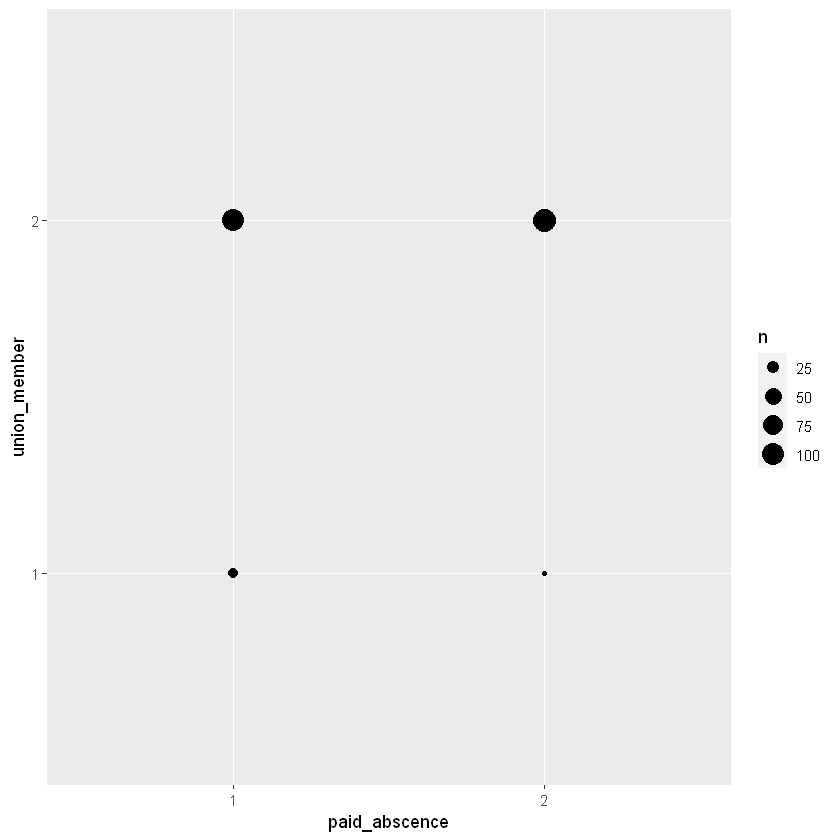

In [64]:
gg  <- ggplot(paid_abscence_data, aes(paid_abscence, union_member))
gg + geom_count()

In [65]:
logit  <- glm(paid_abscence ~ union_member, data = paid_abscence_data, family = "binomial")
#logit
summary(logit)


Call:
glm(formula = paid_abscence ~ union_member, family = "binomial", 
    data = paid_abscence_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)  
(Intercept)    -0.8267     0.4532  -1.824   0.0681 .
union_member2   0.9059     0.4745   1.909   0.0563 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 311.91  on 224  degrees of freedom
Residual deviance: 307.98  on 223  degrees of freedom
AIC: 311.98

Number of Fisher Scoring iterations: 4


Now, let's see what other contributing factors from our dataset may be.  I hypothesize that being a full-time worker means you are more likely to be paid for abscences.

In [66]:
mn.logit  <- glm(paid_abscence ~ union_member + full_time , data = paid_abscence_data, family = "binomial") #mn = multinomial, logit = logitic regression
#logit
summary(mn.logit)


Call:
glm(formula = paid_abscence ~ union_member + full_time, family = "binomial", 
    data = paid_abscence_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.2119     0.5937   2.041   0.0412 *  
union_member2   0.4451     0.4933   0.902   0.3669    
full_time1     -2.1407     0.3848  -5.563 2.66e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 311.91  on 224  degrees of freedom
Residual deviance: 268.42  on 222  degrees of freedom
AIC: 274.42

Number of Fisher Scoring iterations: 4


I hypothesize that being a full-time union worker is more predictive than being a union member or full-time separately.

In [67]:
mn.logit  <- glm(paid_abscence ~ union_member + full_time + union_member:full_time , data = paid_abscence_data, family = "binomial") #mn = multinomial, logit = logitic regression
#logit
summary(mn.logit)


Call:
glm(formula = paid_abscence ~ union_member + full_time + union_member:full_time, 
    family = "binomial", data = paid_abscence_data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                 14.57     882.74   0.017    0.987
union_member2              -12.94     882.74  -0.015    0.988
full_time1                 -15.55     882.74  -0.018    0.986
union_member2:full_time1    13.44     882.74   0.015    0.988

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 311.91  on 224  degrees of freedom
Residual deviance: 267.88  on 221  degrees of freedom
AIC: 275.88

Number of Fisher Scoring iterations: 13


In [68]:
mn.logit  <- glm(paid_abscence ~ union_member + full_time + income_week + hours_week, data = paid_abscence_data, family = "binomial") #mn = multinomial, logit = logitic regression
#logit
summary(mn.logit)


Call:
glm(formula = paid_abscence ~ union_member + full_time + income_week + 
    hours_week, family = "binomial", data = paid_abscence_data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    1.3249343  0.7223075   1.834 0.066608 .  
union_member2  0.2150524  0.5135746   0.419 0.675409    
full_time1    -2.0697532  0.6994707  -2.959 0.003086 ** 
income_week   -0.0009080  0.0002659  -3.415 0.000637 ***
hours_week     0.0263994  0.0237044   1.114 0.265412    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 311.91  on 224  degrees of freedom
Residual deviance: 254.52  on 220  degrees of freedom
AIC: 264.52

Number of Fisher Scoring iterations: 4


It looks like this expansion of the hypothesis was mistaken.

# Additional Data Cleaning, adding new variables

In [69]:
pp.job_qual_3  <- pp.job_qual_2 %>% #Can only be run once, unless you reload the prior data.
    select(-c(full_time_flag))

In [70]:
names(pp.job_qual_3)

pp.job_qual_3  <- pp.job_qual_3 %>%
    mutate(pay_rate = income_week/hours_week)

# todo: add highest level of educational achievement, pay rate

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"

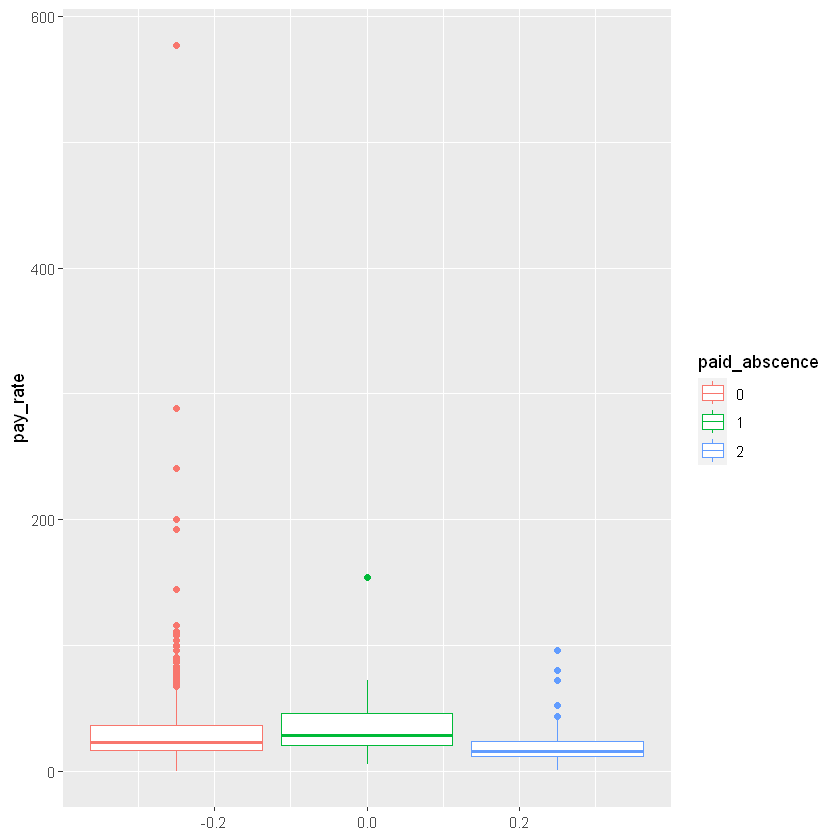

In [71]:
gg  <- ggplot(pp.job_qual_3, aes(group = paid_abscence, y = pay_rate, color = paid_abscence))
gg + geom_boxplot()

# Merging Household and Person Data

Household income can be used as a measure of economic class. The economic classes are defined as lower, middle, and upper. The lower class makes under 2/3 of the median income, the middle class makes from 2/3 to 2 times the median income, and the upper class makes 2 times the median income. 

This method of classification was taken from Pew Research Center analysis of the 2021 Current Population Survey, Annual Social and Economic Supplement (IPUMS).

Since this study is concerned with predictors of job outcome, the classification of economic class is included in order to determine the degree of impact of economic class on job outcomes.

In order to consider household income, the datasets for individuals and households must be merged, so that we can assess the impact of household income, representative of class, on individuals. By doing this, we are able to make relatively more holistic judgements.

It is relevant to note that household income is a measure of the prior year. Ideally, we would want to trace housheold income back across sevral years in order to have a more accurate predictive and explanatory capability. Such an analysis is beyond the scope of this study, and is already present in the literature. The literature notes that US household income distribution has not changed significantly over the years. (Pew Research Center, 2022)

In [72]:
summary(hh)
hh   <- rename(hh, hh_income = HTOTVAL)
hh   <- rename(hh, hh_persons = H_NUMPER)

     H_SEQ          HTOTVAL           H_NUMPER     
 Min.   :    1   Min.   : -19935   Min.   : 0.000  
 1st Qu.:22300   1st Qu.:      0   1st Qu.: 0.000  
 Median :44599   Median :  34000   Median : 1.000  
 Mean   :44599   Mean   :  67996   Mean   : 1.712  
 3rd Qu.:66898   3rd Qu.:  95156   3rd Qu.: 3.000  
 Max.   :89197   Max.   :2320191   Max.   :16.000  

In [73]:
names(hh)

#rename(iris, petal_length = Petal.Length)

gg  <- ggplot(hh, aes(hh_income))
#gg + geom_density()

[1] "H_SEQ"      "hh_income"  "hh_persons"

## Adjusted Income

Household income does not account for income per people the income supports. To correct for this, adjusted income can be calculated as the total household income divided by the number of persons in the household times 1/2, following other researchers. (Pew Research Center, 2022)

$$\text{adjusted household income} = \text{household income}/\text{# of household members}^{0.5}$$

In [74]:
# adjusted income
n = .5

hh  <- hh %>% mutate(income_adj  = hh_income/((hh_persons)^.5))

hh  <- hh %>% drop_na()

head(hh, 10)

,H_SEQ,hh_income,hh_persons,income_adj
,<int>,<int>,<int>,<dbl>
1,1,44220,1,44220.00
2,5,82752,2,58514.50
3,6,60001,2,42427.11
4,9,123814,5,55371.30
5,10,31184,2,22050.42
6,11,0,2,0.00
7,12,19783,1,19783.00
8,13,72370,4,36185.00
9,15,44000,2,31112.70


Economic class, `income_class` can then be calculated as a function of adjusted income, producing a more accurate estimate of class in terms of income/people supported.

In [75]:
lower_bound <- 2/3 * median(hh$income_adj)
upper_bound  <- 2 * median(hh$income_adj)
#lc

hh$income_class <- as.factor(ifelse(hh$income_adj < lower_bound, 'lower',
                          ifelse(hh$income_adj > upper_bound, "upper", "middle")))

#hh_econ_class  <- hh %>%
    

In [76]:
head(hh, 10)

,H_SEQ,hh_income,hh_persons,income_adj,income_class
,<int>,<int>,<int>,<dbl>,<fct>
1,1,44220,1,44220.00,middle
2,5,82752,2,58514.50,middle
3,6,60001,2,42427.11,middle
4,9,123814,5,55371.30,middle
5,10,31184,2,22050.42,lower
6,11,0,2,0.00,lower
7,12,19783,1,19783.00,lower
8,13,72370,4,36185.00,middle
9,15,44000,2,31112.70,lower


In [141]:
hhpp.dat <- inner_join(pp.job_qual_3, hh, by = c("H_SEQ"))

summary(hhpp.dat)
dim(hhpp.dat)

     H_SEQ           PPPOS      labor_code paid_abscence   hours_week    
 Min.   :    5   41     :5240   1:9943     0:9943        Min.   :  1.00  
 1st Qu.:22695   42     :3530   2: 225     1: 113        1st Qu.: 40.00  
 Median :44297   43     : 906              2: 112        Median : 40.00  
 Mean   :44992   44     : 313                            Mean   : 39.25  
 3rd Qu.:68291   45     : 107                            3rd Qu.: 40.00  
 Max.   :88866   46     :  42                            Max.   :104.00  
                 (Other):  30                                            
      race      union_coverage union_member  income_week   education_level
 1      :8133   0: 998         1: 998       Min.   :   1   39     :2670   
 2      :1059   1: 126         2:9170       1st Qu.: 600   43     :2634   
 4      : 625   2:9044                      Median : 933   40     :1510   
 3      : 132                               Mean   :1135   44     :1157   
 5      :  57                    

[1] 10168    18

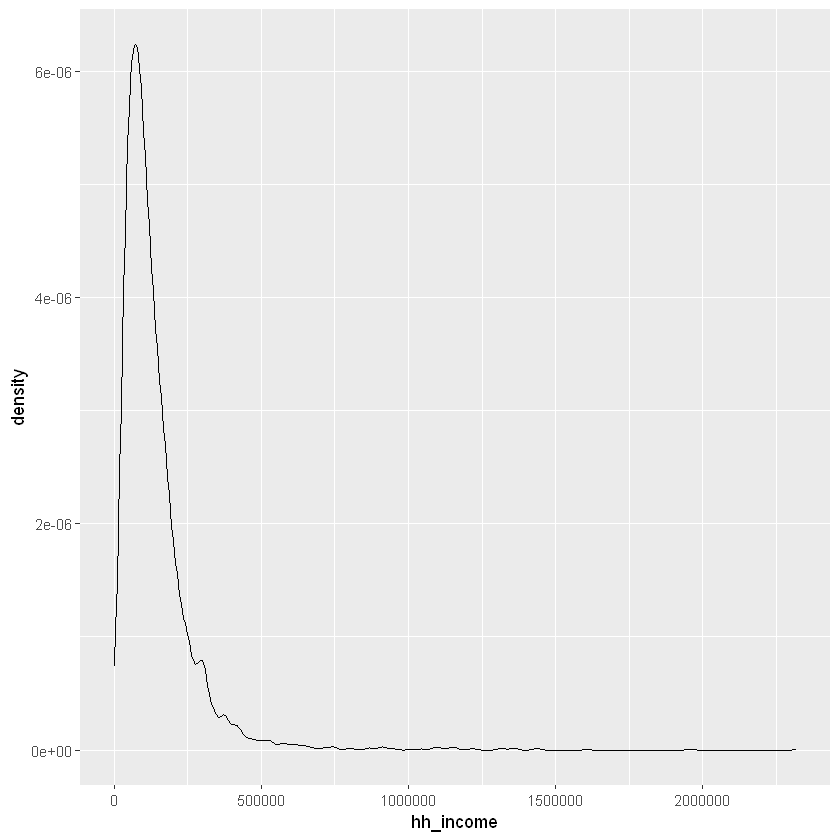

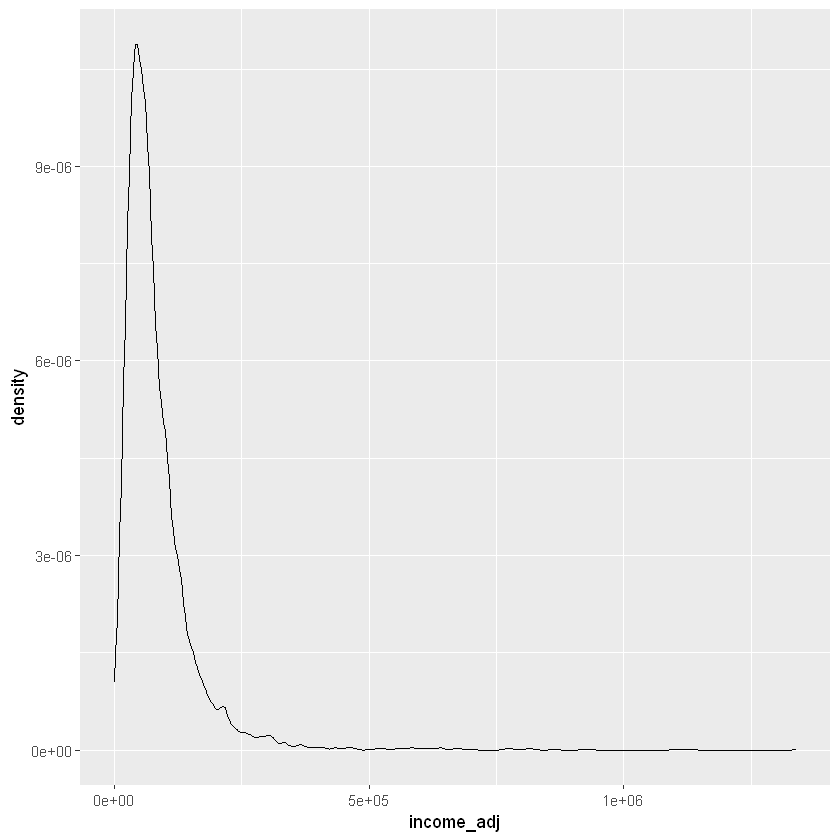

In [78]:
gg  <- ggplot(hhpp.dat, aes(hh_income))
gg + geom_density()

gg_adj  <- ggplot(hhpp.dat, aes(income_adj))
gg_adj + geom_density()

Adjusting household income has the added side benefit of somewhat normalizing our data by reducing the distribution of income (see below):

In [79]:
#print("SUMMARIES")
print("Household income")
summary(hhpp.dat$hh_income)
print("Adjusted household income")
summary(hhpp.dat$income_adj)

[1] "Household income"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   63590  105001  138301  170001 2320191 

[1] "Adjusted household income"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   40258   63538   83062  100770 1339563 

In [80]:
head(hhpp.dat, 20)

hhpp.dat  <- hhpp.dat %>%
    mutate(pay_rate = income_week/hours_week)

hhpp.dat$union_coverage  <- as.factor(hhpp.dat$union_coverage)
hhpp.dat$union_member  <- as.factor(hhpp.dat$union_member)

table(hhpp.dat$union_coverage)
#hhpp.dat$union_coverage  <- relevel(hhpp.dat$union_coverage, ref = "0")
table(hhpp.dat$union_coverage)

summary(hhpp.dat)

,H_SEQ,PPPOS,labor_code,paid_abscence,hours_week,race,union_coverage,union_member,income_week,education_level,gender_binary,full_time,part_time,pay_rate,hh_income,hh_persons,income_adj,income_class
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,5,42,2,1,40,1,0,1,923,43,2,1,0,23.07500,82752,2,58514.50,middle
2,9,41,1,0,55,1,2,2,1538,44,2,1,0,27.96364,123814,5,55371.30,middle
3,9,42,1,0,50,1,2,2,2885,42,1,1,0,57.70000,123814,5,55371.30,middle
4,77,41,1,0,50,1,2,2,1000,45,2,1,0,20.00000,73513,2,51981.54,middle
5,77,42,1,0,20,1,2,2,330,40,1,0,1,16.50000,73513,2,51981.54,middle
6,97,41,1,0,50,1,0,1,606,43,2,1,0,12.12000,18002,1,18002.00,lower
7,135,41,1,0,40,1,2,2,720,37,1,1,0,18.00000,30000,1,30000.00,lower
8,149,41,1,0,40,1,2,2,1090,43,2,1,0,27.25000,106735,4,53367.50,middle
9,171,41,1,0,36,1,2,2,1300,43,2,1,0,36.11111,162204,2,114695.55,upper



   0    1    2 
 998  126 9044 


   0    1    2 
 998  126 9044 

     H_SEQ           PPPOS      labor_code paid_abscence   hours_week    
 Min.   :    5   41     :5240   1:9943     0:9943        Min.   :  1.00  
 1st Qu.:22695   42     :3530   2: 225     1: 113        1st Qu.: 40.00  
 Median :44297   43     : 906              2: 112        Median : 40.00  
 Mean   :44992   44     : 313                            Mean   : 39.25  
 3rd Qu.:68291   45     : 107                            3rd Qu.: 40.00  
 Max.   :88866   46     :  42                            Max.   :104.00  
                 (Other):  30                                            
      race      union_coverage union_member  income_week   education_level
 1      :8133   0: 998         1: 998       Min.   :   1   39     :2670   
 2      :1059   1: 126         2:9170       1st Qu.: 600   43     :2634   
 4      : 625   2:9044                      Median : 933   40     :1510   
 3      : 132                               Mean   :1135   44     :1157   
 5      :  57                    

Seeing as the levels of income likely vary systematically, it may be a good idea to split lower, middle, and upper-class people by income and analyze them separately.

In [81]:
hhpp_lower_income  <- hhpp.dat %>%
    filter(income_class == c('lower'))

hhpp_middle_income  <- hhpp.dat %>%
    filter(income_class == c('middle'))

hhpp_upper_income  <- hhpp.dat %>%
    filter(income_class == c('upper'))

In [82]:
#summary(hhpp_lower_income$income_class)
#summary(hhpp_middle_income$income_class)
#summary(hhpp_upper_income$income_class) 
# validation check pass

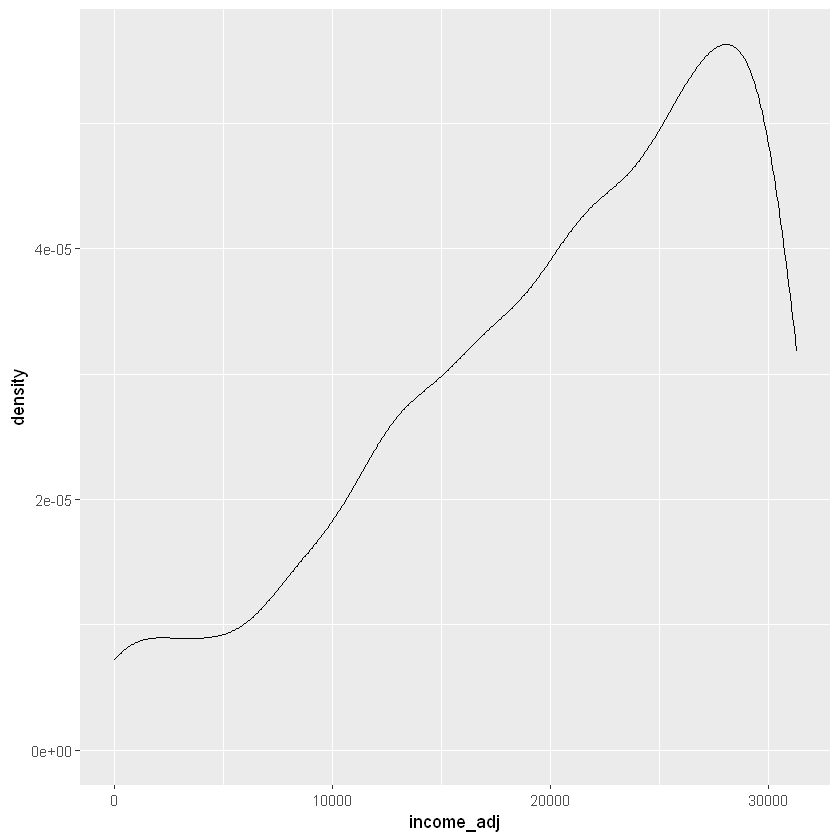

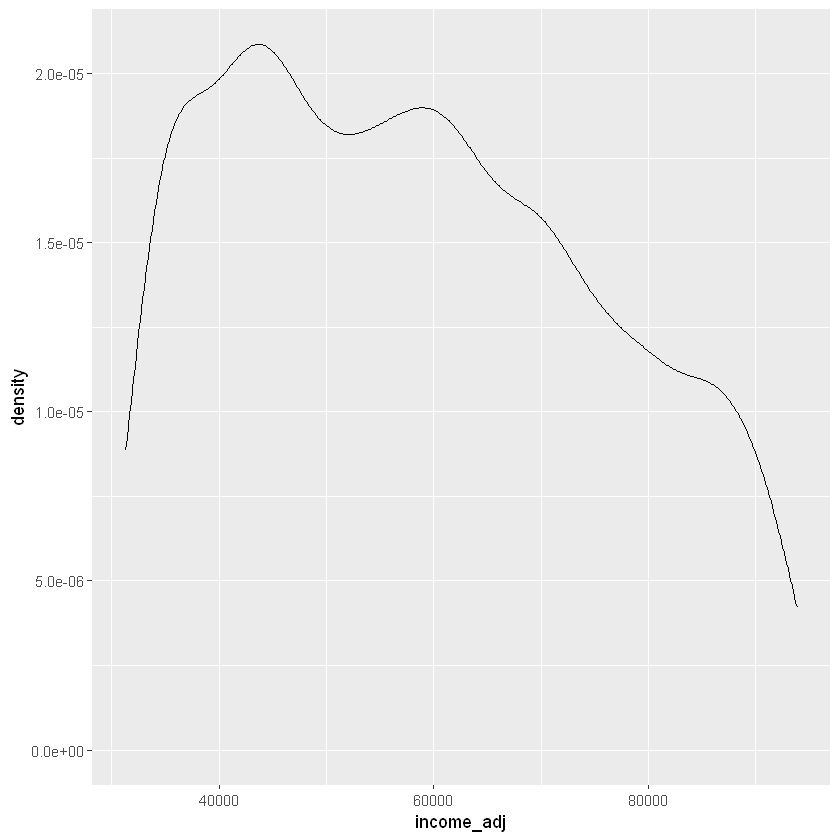

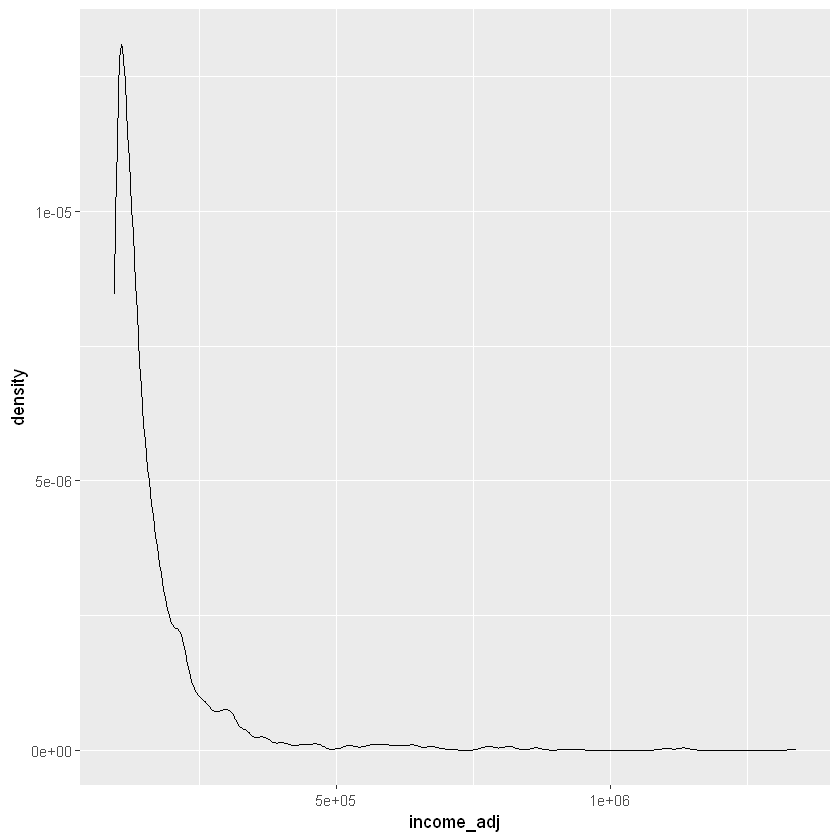

In [83]:
gg_adj  <- ggplot(hhpp_lower_income, aes(income_adj))
gg_adj + geom_density()

gg_adj  <- ggplot(hhpp_middle_income, aes(income_adj))
gg_adj + geom_density()

gg_adj  <- ggplot(hhpp_upper_income, aes(income_adj))
gg_adj + geom_density()

In [84]:
names(hhpp.dat)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

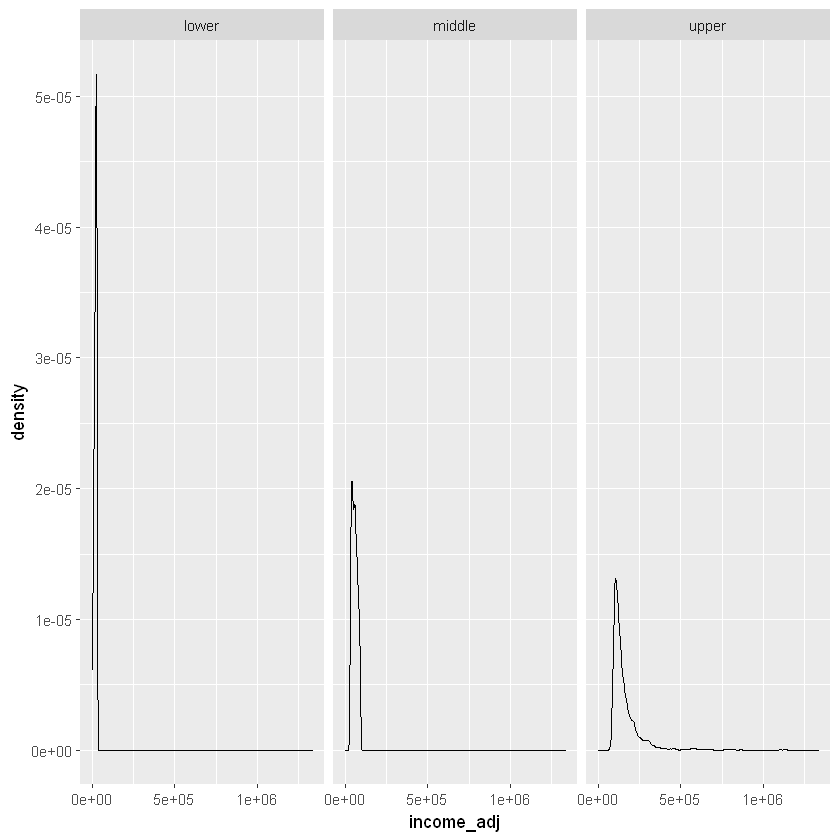

In [85]:
#let's do a facet wrap of adjusted income by income class
gg_adj  <- ggplot(hhpp.dat, aes(income_adj)) + geom_density()
gg_adj + facet_grid(cols = vars(income_class))

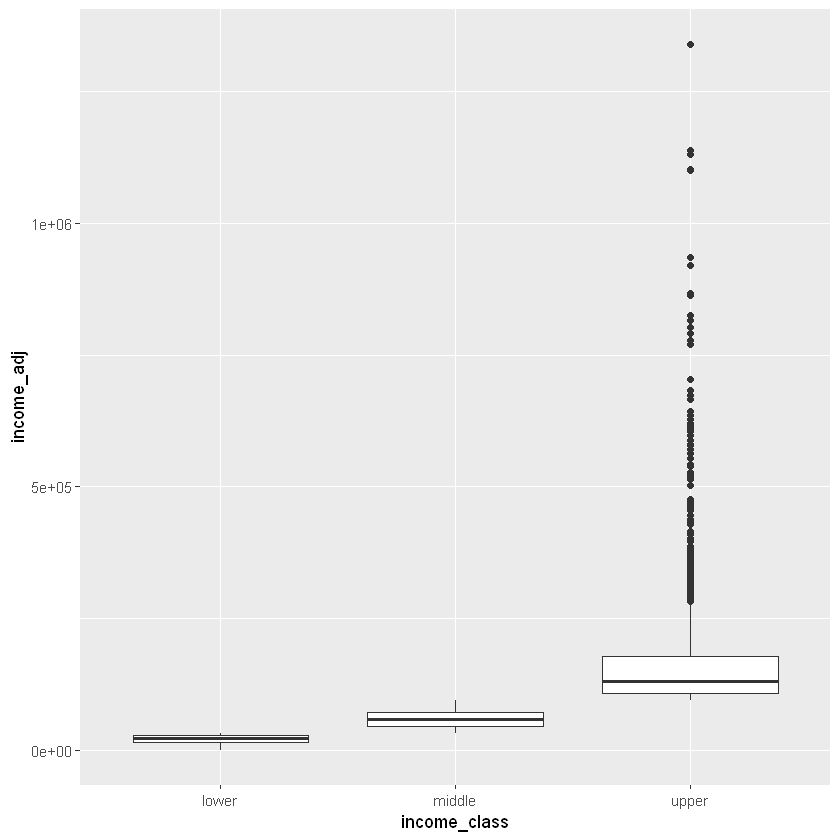

In [86]:
gg_adj_box  <- ggplot(hhpp.dat, aes(income_adj, x =income_class)) + geom_boxplot()
gg_adj_box
#gg_adj + facet_grid(cols =vars(income_class))

ERROR while rich displaying an object: Error in `combine_vars()`:
! At least one layer must contain all faceting variables: `A_HGA`
✖ Plot is missing `A_HGA`
✖ Layer 1 is missing `A_HGA`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_ha

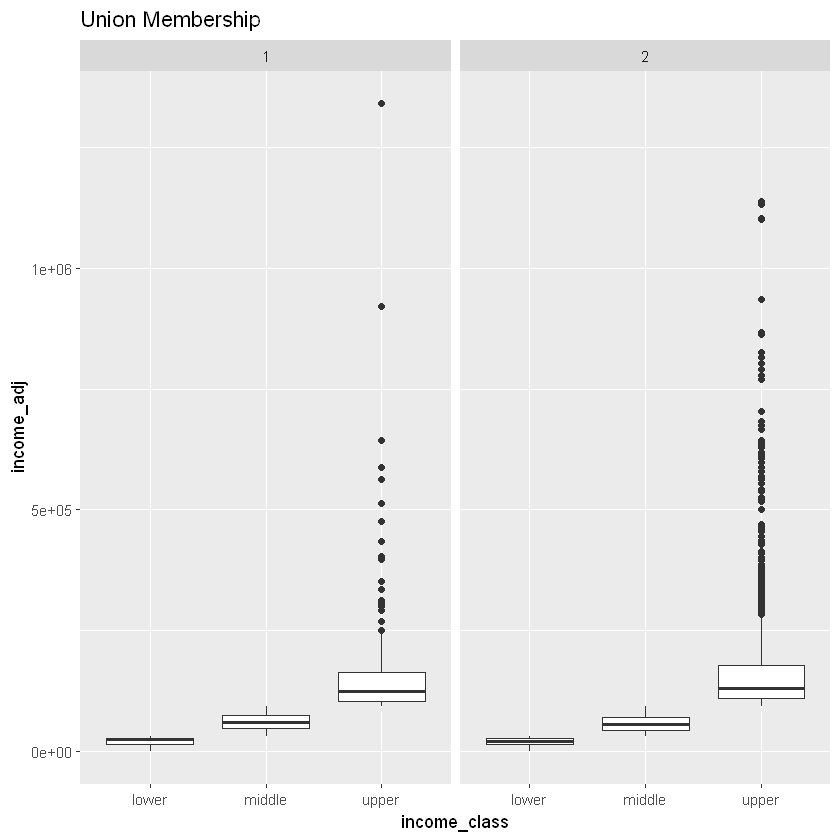

In [87]:
gg_adj_box  <- ggplot(hhpp.dat, aes(income_adj, x =income_class)) + geom_boxplot()
gg_adj_box + facet_grid(cols =vars(A_HGA)) + labs(title = "Education")
gg_adj_box + facet_grid(cols =vars(union_member)) + labs(title = "Union Membership")
gg_adj_box + facet_grid(cols =vars(A_SEX)) + labs(title = "Sex")
gg_adj_box + facet_wrap(vars(PRDTRACE)) + labs(title = "Race")
#gg_adj_box

# Revisiting Unions

Unions have been credited for the development of the middle class in the United States, namely with the economic recovery of the great depression and the formation of the middle economic class from the 1940s to 1960s. Union membership and coverage are considered together, with the variable level of interest being union coverage. Union membership implies union coverage.

## Union Membership, Union Coverage, and Weekly Income

We will first consider union membership and union coverage as predictors of weekly income, in order to whether differences in effect exist between the two. I hypothesize that there is no significant difference between the predictive ability of union membership and union coverage; they both imply the same thing, being the additional worker protections conferred through union membership.

Importantly, they refer to separate populations, as the population of those covered by unions is within the universe of those who are **not** union members.

In [88]:
names(hhpp.dat)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

 union_coverage  income_week  
 0: 998         Min.   :   1  
 1: 126         1st Qu.: 600  
 2:9044         Median : 933  
                Mean   :1135  
                3rd Qu.:1513  
                Max.   :2885  


   0    1    2 
 998  126 9044 

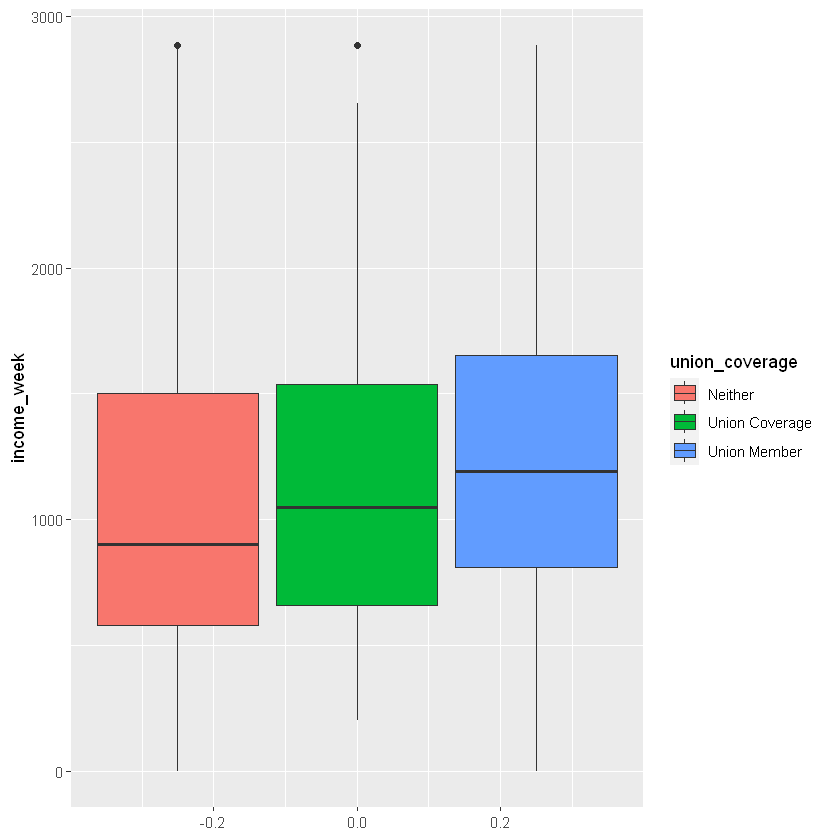

In [89]:
# gg_unmem   <- ggplot(data = hhpp.dat, aes(y =income_week, group =union_member, fill = union_member))
# gg_unmem + geom_boxplot()

uncov_viz.df  <- hhpp.dat %>%
     select(union_coverage, income_week)

summary(uncov_viz.df)

table(uncov_viz.df$union_coverage)

uncov_viz.df$union_coverage <- recode_factor(uncov_viz.df$union_coverage, "2" = "Neither", 
                                 "1" = "Union Coverage", "0" = "Union Member")

gg_unmem   <- ggplot(data = uncov_viz.df, aes(y =income_week, group =union_coverage, fill = union_coverage))
gg_unmem + geom_boxplot()

Based on these boxplot visualisations, it looks like there is a stratified relationship, where not being covered implies a lower level of weekly income. Union coverage raises income, while union membership raises income even more.

In [90]:
# glm take 2
# hhpp.dat$union_coverage <- recode_factor(hhpp.dat$union_coverage, "0" = "2", 
#                                  "1" = "1", "2" = "0")

`geom_smooth()` using formula = 'y ~ x'


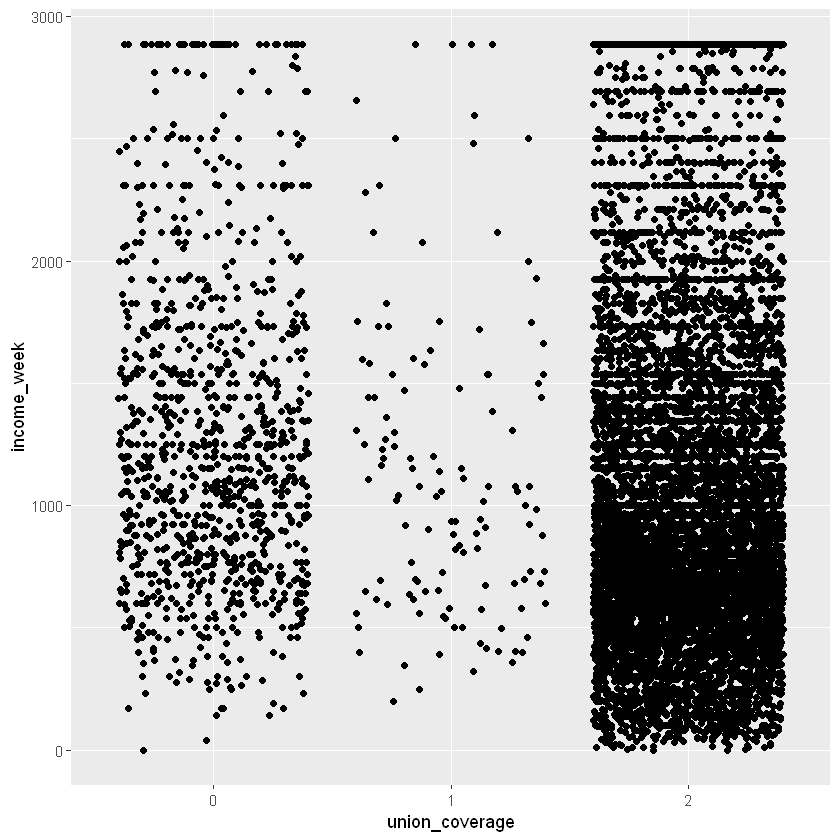

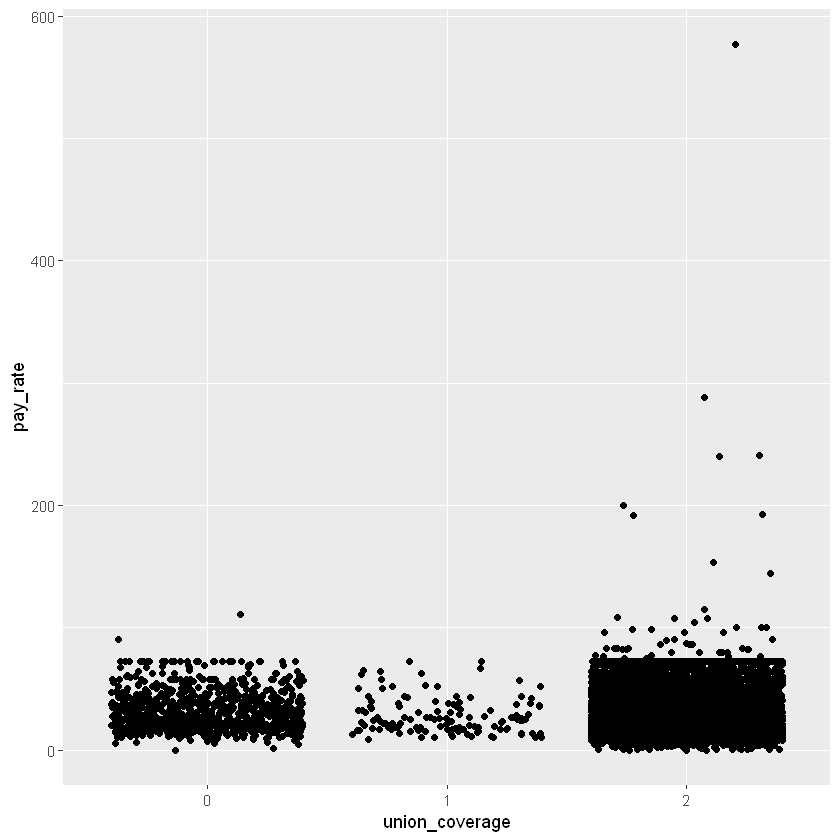

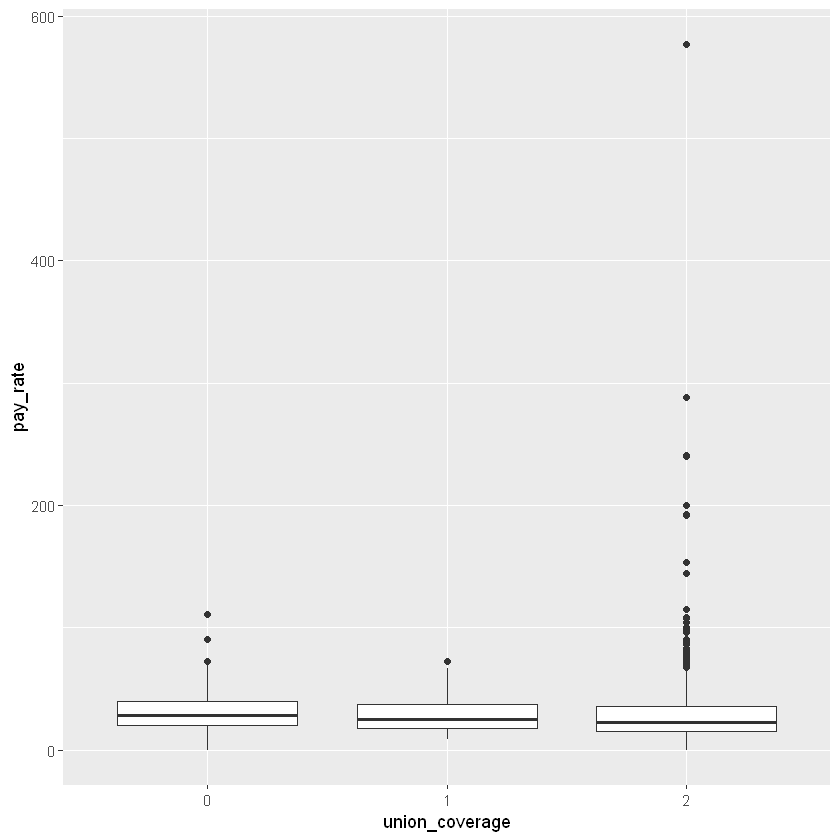

In [91]:
#predict(glm_unions, type = "response")

ggplot(dat=hhpp.dat, aes(y = income_week, x = union_coverage)) + 
      geom_jitter() +
      geom_smooth(method = "glm")

ggplot(dat=hhpp.dat, aes(y = pay_rate, x = union_coverage)) + 
      geom_jitter()

ggplot(dat=hhpp.dat, aes(y = pay_rate, x = union_coverage)) + 
      geom_boxplot()

In [92]:
summary(hhpp.dat$union_coverage)

glm_unions  <- glm(income_week ~ union_coverage, data = hhpp.dat, family = Gamma("inverse")) 
summary(glm_unions)

0    1    2 
 998  126 9044


Call:
glm(formula = income_week ~ union_coverage, family = Gamma("inverse"), 
    data = hhpp.dat)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.696e-04  1.613e-05  47.698  < 2e-16 ***
union_coverage1 9.079e-05  5.327e-05   1.705   0.0883 .  
union_coverage2 1.258e-04  1.730e-05   7.273 3.78e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4386565)

    Null deviance: 5052.7  on 10167  degrees of freedom
Residual deviance: 5031.1  on 10165  degrees of freedom
AIC: 160546

Number of Fisher Scoring iterations: 6


In [93]:
glm_unions  <- glm(income_week ~ union_coverage, data = hhpp_lower_income, family = Gamma("inverse")) 
summary(glm_unions)

glm_unions  <- glm(income_week ~ union_coverage, data = hhpp_middle_income, family = Gamma("inverse")) 
summary(glm_unions)

table(hhpp_middle_income$union_coverage)


Call:
glm(formula = income_week ~ union_coverage, family = Gamma("inverse"), 
    data = hhpp_lower_income)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1.185e-03  8.615e-05  13.751  < 2e-16 ***
union_coverage1 1.250e-04  2.264e-04   0.552 0.581102    
union_coverage2 3.316e-04  9.016e-05   3.677 0.000243 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4600979)

    Null deviance: 709.99  on 1600  degrees of freedom
Residual deviance: 704.27  on 1598  degrees of freedom
AIC: 23483

Number of Fisher Scoring iterations: 6



Call:
glm(formula = income_week ~ union_coverage, family = Gamma("inverse"), 
    data = hhpp_middle_income)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     8.351e-04  2.029e-05  41.160   <2e-16 ***
union_coverage1 5.608e-05  6.706e-05   0.836    0.403    
union_coverage2 1.826e-04  2.206e-05   8.276   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.3600567)

    Null deviance: 2237.0  on 5652  degrees of freedom
Residual deviance: 2213.8  on 5650  degrees of freedom
AIC: 87065

Number of Fisher Scoring iterations: 5



   0    1    2 
 610   70 4973 

In [94]:
glm_unions  <- glm(pay_rate ~ union_coverage, data = hhpp.dat, family = Gamma("inverse")) 
summary(glm_unions)

glm_unions  <- glm(pay_rate ~ union_coverage, data = hhpp_lower_income, family = Gamma("inverse")) 
summary(glm_unions)

glm_unions_middle_income  <- glm(pay_rate ~ union_coverage, data = hhpp_middle_income, family = Gamma("inverse")) 
summary(glm_unions_middle_income)

# attributes(glm_unions_middle_income)

#glm_unions  <- glm(pay_rate ~ union_coverage, data = hhpp_upper_income, family = Gamma("inverse")) 
#summary(glm_unions)


Call:
glm(formula = pay_rate ~ union_coverage, family = Gamma("inverse"), 
    data = hhpp.dat)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0318690  0.0006571  48.497  < 2e-16 ***
union_coverage1 0.0032200  0.0021397   1.505    0.132    
union_coverage2 0.0037766  0.0007010   5.387 7.32e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4243306)

    Null deviance: 3609.3  on 10167  degrees of freedom
Residual deviance: 3597.6  on 10165  degrees of freedom
AIC: 83329

Number of Fisher Scoring iterations: 6



Call:
glm(formula = pay_rate ~ union_coverage, family = Gamma("inverse"), 
    data = hhpp_lower_income)

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.047155   0.003505  13.453   <2e-16 ***
union_coverage1 0.003023   0.008918   0.339   0.7347    
union_coverage2 0.007258   0.003638   1.995   0.0462 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4806762)

    Null deviance: 459.25  on 1600  degrees of freedom
Residual deviance: 457.39  on 1598  degrees of freedom
AIC: 11514

Number of Fisher Scoring iterations: 6



Call:
glm(formula = pay_rate ~ union_coverage, family = Gamma("inverse"), 
    data = hhpp_middle_income)

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0344756  0.0008008  43.054  < 2e-16 ***
union_coverage1 0.0015495  0.0025966   0.597    0.551    
union_coverage2 0.0056468  0.0008647   6.530 7.14e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.329087)

    Null deviance: 1562.8  on 5652  degrees of freedom
Residual deviance: 1549.2  on 5650  degrees of freedom
AIC: 44000

Number of Fisher Scoring iterations: 5


To briefly summarize, union memers' pay rates are overall lower than the sum of people in the workforce who are not covered by unions (non-unionized work force). People with union coverage do not differ substantially from those of union members. This trend continues for lower-income people and middle-income people: the pay rates of union members are lower, albeit marginally, than those from the non-unionized work force. I suspect that this is because more heavily unionized professions may simply have an overall lesser pay rate.

Nevertheless, the single-variable predictor nature of the above models means they cannot account for these more complex distinctuons. These models are broad pointers towards a general trend, but fail to explain its specifics and therefore are not useful for explaining the real-world data, so they cannot be used to draw conclusions about the real-world relationships between union membership, coverage, and pay rates.

Furthermore, the Akaike Information Criterion for the models that predict pay_rate is about half those of the income_week models, suggesting that pay_rate may be a better response variable for the question of analysis.

pay rate ~ education + income class

start with pay rate by income class
then go to pay rate by education
then make a combined model, where pay rate ~ education + income class.

In [95]:
names(hhpp.dat)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

In [96]:
# PAY RATE BY INCOME CLASS: normalizing data (the boxplots clearly show outliers, which will make model coefficients more difficult to interpret.)

gg_box_income  <- ggplot(hhpp.dat, aes(income_class, pay_rate)) + geom_boxplot()
# gg_box_income

summary(hhpp_lower_income$pay_rate)
summary(hhpp_middle_income$pay_rate)
summary(hhpp_upper_income$pay_rate)

#######################################################

hhpp_lower_income_payrate_normal  <- hhpp_lower_income %>%
    filter(pay_rate > 12.167)

hhpp_lower_income_payrate_normal  <- hhpp_lower_income_payrate_normal %>%
    filter(pay_rate < 20.692)

summary(hhpp_lower_income_payrate_normal$pay_rate)

#######################################################

hhpp_middle_income_payrate_normal  <- hhpp_middle_income %>%
    filter(pay_rate > 15.875)

hhpp_middle_income_payrate_normal  <- hhpp_middle_income_payrate_normal %>%
    filter(pay_rate < 31.250)

summary(hhpp_middle_income_payrate_normal$pay_rate)

#######################################################

hhpp_upper_income_payrate_normal  <- hhpp_upper_income %>%
    filter(pay_rate > 23.089)

hhpp_upper_income_payrate_normal  <- hhpp_upper_income_payrate_normal %>%
    filter(pay_rate < 53.3937)

summary(hhpp_upper_income_payrate_normal$pay_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.025  12.167  15.700  18.549  20.692 240.417 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.025  15.875  21.750  25.399  31.250 288.375 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0143  23.0893  37.5000  39.5839  53.3937 577.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.22   14.02   15.70   16.05   18.00   20.68 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.91   18.46   21.62   22.17   25.00   31.23 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  23.10   30.00   37.50   37.72   45.12   53.38 

In [97]:
# joining income pay rate normal data frames
dim(hhpp_lower_income_payrate_normal)

dim(hhpp_middle_income)
dim(hhpp_middle_income_payrate_normal) # dims about 2/3

dim(hhpp_upper_income)
dim(hhpp_upper_income_payrate_normal) # dims about 1/2

[1] 799  18

[1] 5653   18

[1] 2793   18

[1] 2914   18

[1] 1456   18

In [98]:
names(hhpp_lower_income_payrate_normal)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

In [99]:
hhpp_lower_middle  <- full_join(hhpp_lower_income_payrate_normal, hhpp_middle_income_payrate_normal, c("H_SEQ", "PPPOS","pay_rate"))

In [100]:
dim(hhpp_lower_middle)

sum(799, 2793)

[1] 3592   33

[1] 3592

In [101]:
hhpp_lower_middle_upper  <- full_join(hhpp_lower_middle, hhpp_upper_income_payrate_normal, c("H_SEQ", "PPPOS","pay_rate"))
dim(hhpp_lower_middle_upper)
sum(3592, 1456)

hhpp_lower_middle_upper_2 <- hhpp_lower_middle_upper %>%
    select(H_SEQ, PPPOS, pay_rate)

head(hhpp_lower_middle_upper_2, 10)

hhpp_normal_payrate  <- right_join(hhpp.dat, hhpp_lower_middle_upper_2, c("H_SEQ", "PPPOS","pay_rate"))

head(hhpp_normal_payrate, 10)
dim(hhpp_normal_payrate)

dim(hhpp.dat)

[1] 5048   48

[1] 5048

,H_SEQ,PPPOS,pay_rate
,<int>,<fct>,<dbl>
1,135,41,18.00000
2,224,42,15.00000
3,288,41,15.62857
4,288,42,14.30000
5,377,41,15.00000
6,1527,41,13.00000
7,1060,41,17.75000
8,1731,41,16.81250
9,1802,42,17.50000


,H_SEQ,PPPOS,labor_code,paid_abscence,hours_week,race,union_coverage,union_member,income_week,education_level,gender_binary,full_time,part_time,pay_rate,hh_income,hh_persons,income_adj,income_class
,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<dbl>,<fct>
1,5,42,2,1,40,1,0,1,923,43,2,1,0,23.07500,82752,2,58514.50,middle
2,9,41,1,0,55,1,2,2,1538,44,2,1,0,27.96364,123814,5,55371.30,middle
3,77,41,1,0,50,1,2,2,1000,45,2,1,0,20.00000,73513,2,51981.54,middle
4,77,42,1,0,20,1,2,2,330,40,1,0,1,16.50000,73513,2,51981.54,middle
5,135,41,1,0,40,1,2,2,720,37,1,1,0,18.00000,30000,1,30000.00,lower
6,149,41,1,0,40,1,2,2,1090,43,2,1,0,27.25000,106735,4,53367.50,middle
7,171,41,1,0,36,1,2,2,1300,43,2,1,0,36.11111,162204,2,114695.55,upper
8,182,41,1,0,56,1,2,2,1032,43,2,1,0,18.42857,149802,5,66993.49,middle
9,182,43,1,0,40,1,2,2,800,40,1,1,0,20.00000,149802,5,66993.49,middle


[1] 5048   18

[1] 10168    18

It looks like by removing the outliers of pay rate from lower, middle, and upper income has halved the dataset. Admittedly, defining outliers as anyone who falls below the 2nd quantile or above the 3rd quantile is a broad brute-force approach that most definitely excludes high leverage points in addition to outliers.

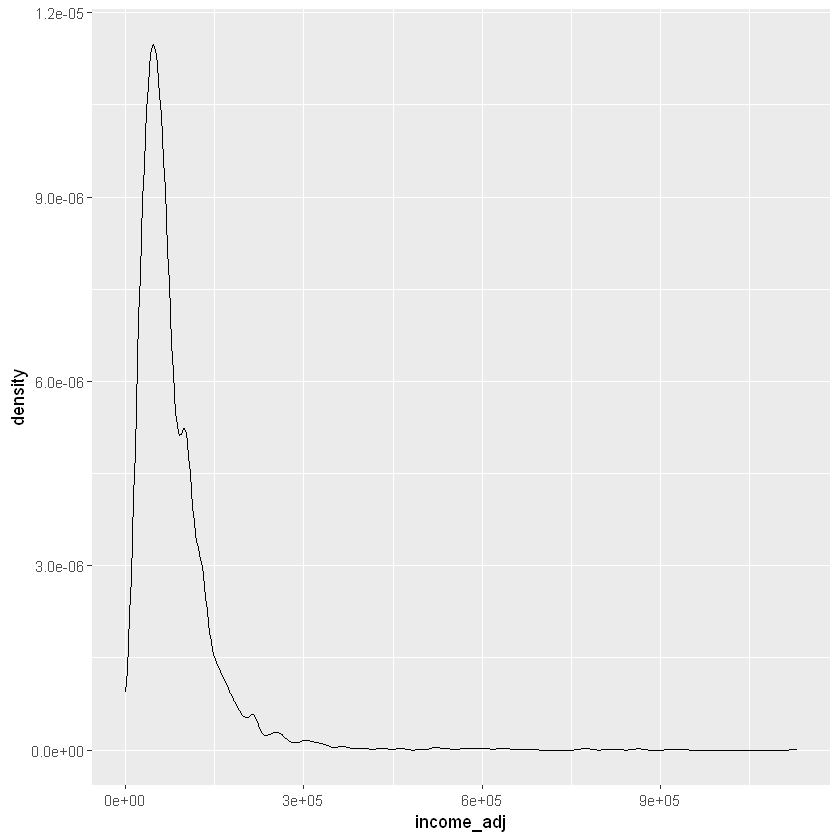

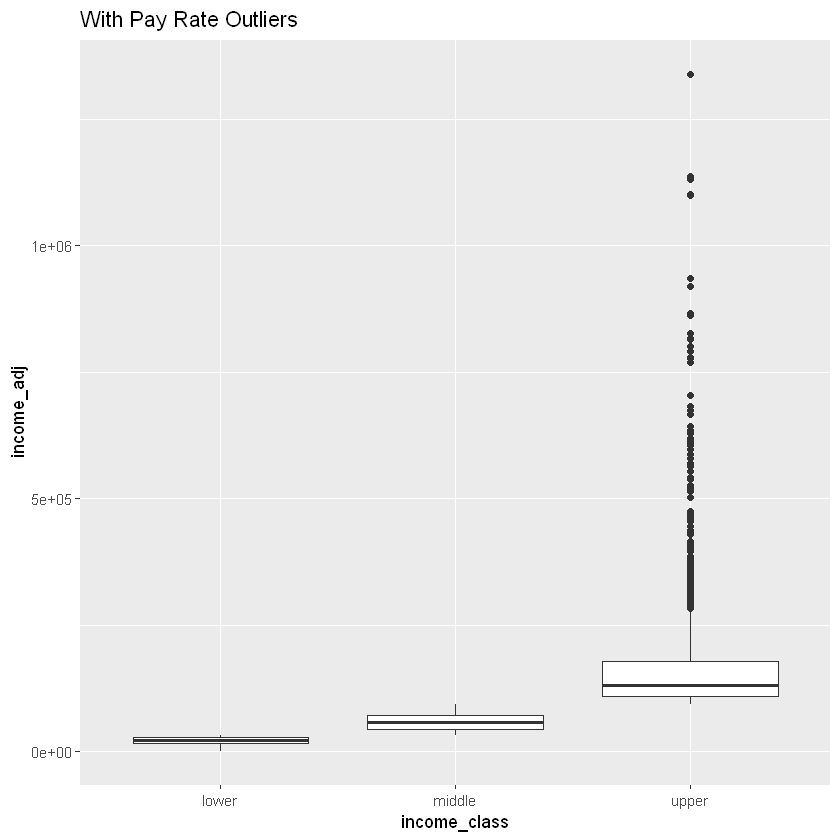

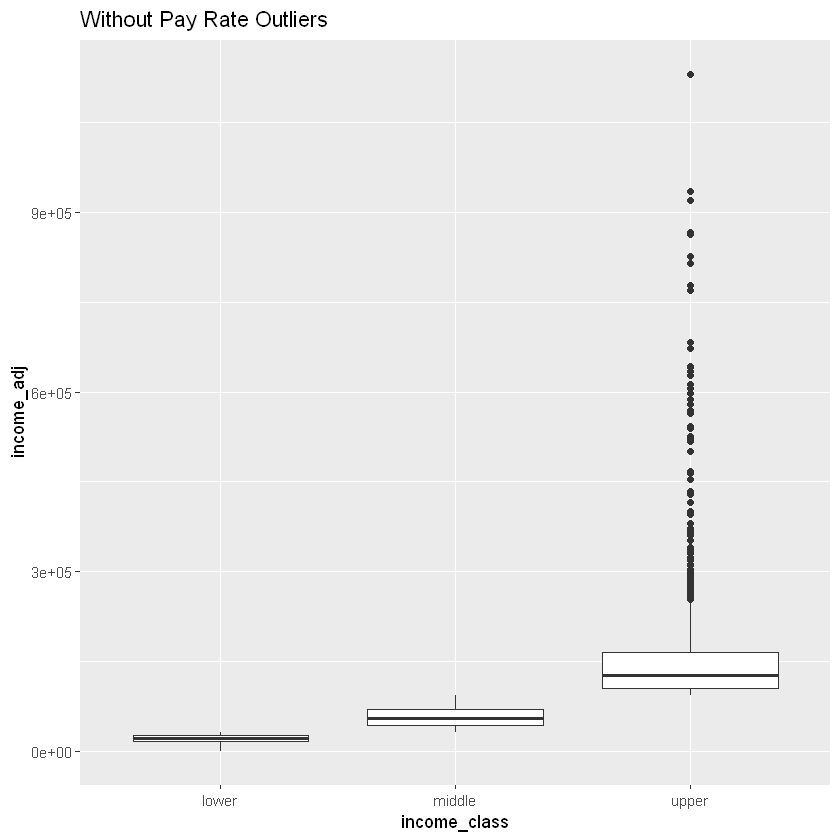

In [102]:
ggplot(data = hhpp_normal_payrate, aes(income_adj)) + geom_density()
ggplot(data = hhpp.dat, aes(income_adj, x =income_class)) + geom_boxplot() + labs(title = "With Pay Rate Outliers")
ggplot(data = hhpp_normal_payrate, aes(income_adj, x =income_class)) + geom_boxplot() + labs(title = "Without Pay Rate Outliers")

If you look at the boxplot of adjusted income with pay rate outliers versus the boxplot of adjusted income without pay rate outliers, you can see that the distributions appear virtually identical. Note that the upper bound of the data has changed from over a million dollars to around a million dollars, eliminating some of the higher-income outliers.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


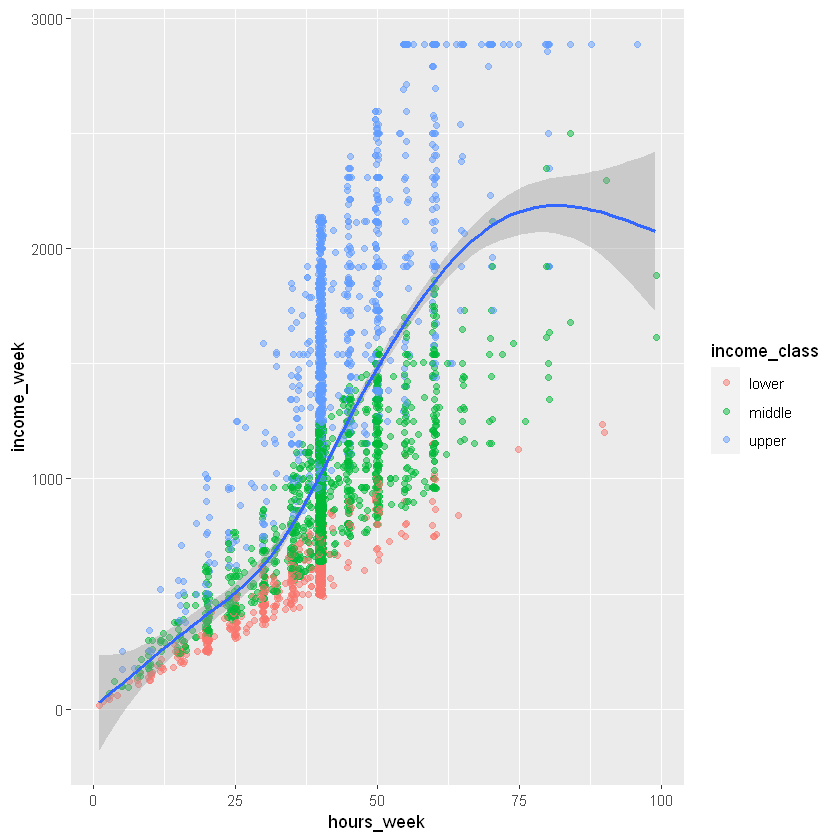

In [103]:
ggplot(data = hhpp_normal_payrate, aes(y =income_week, hours_week)) + geom_jitter(data = hhpp_normal_payrate, alpha = .5, aes(color = income_class)) + geom_smooth()

This scatterplot shows weekly income plotted against weekly hours. The line is a pointer towards the average pay rate, where for any given point x, y the average pay rate can be determined by dividing y/x.

As you can see, the outliers & high leverage points have been precisely sliced with the brute-force approach from earlier. Nevertheless, there is a fair degree of variance remaining in the data.

Even after the culling, the upper-class outliers remain, and  skew our data somewhat, but the trend line still appears to be running down the middle. So they may also be high leverage points. Given the great culling that has already occured, I am reluctant to cut the upper class down once more.

The pay rate for the upper-class outliers is 53.

Based on this data, I expect the pay rates of lower, middle, and upper income people to differ significantly. Lower income people will obviously be on the bottom of the totem pole, followed by middle income people, and then by upper-income people. The starkest difference will be between upper-income people and their middle-income and lower-income counterparts.

Functional Model:

$$f(x) = \beta_{0} + \beta_{middle-income}X_{middle-income} + \beta_{upper-income}X_{upper-income} +\epsilon_{income} $$

Where $\beta_{0} +\epsilon_{income}$ represents the baseline, but also the regression coefficients for lower-income people, who are our baseline.

$f(x)$ represents the predicted pay rate for a given level of income (lower/middle/upper).

Before we run our model, let's take a good look at the distribution of pay rates by income class.

In [143]:
dim(hhpp_normal_payrate)

[1] 5048   18

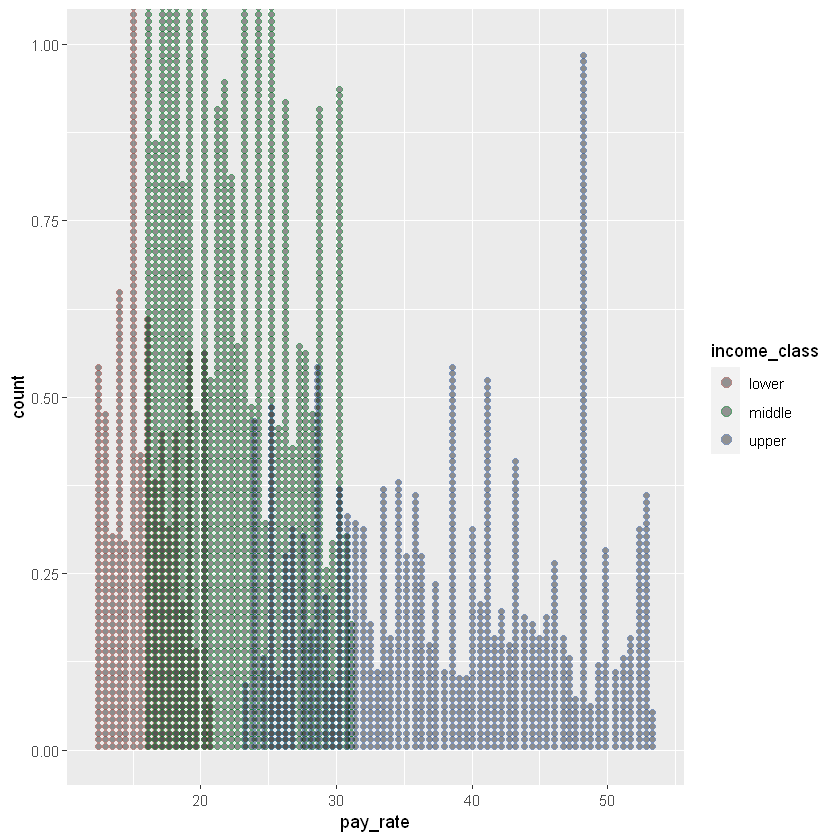

In [104]:
gg_payrate_income_lvl  <- ggplot(data = hhpp_normal_payrate, aes(pay_rate)) + geom_dotplot(data = hhpp_normal_payrate, binwidth = .5, alpha = .4, aes(color = income_class)) 
gg_payrate_income_lvl 

This graph shows: How many people receive a specific pay rate (represented by the stacked dots) by income class. As you can see, there is an overlap between the pay rates of the lower class and middle class, as well as the middle class and upper class. However, the classes in and of themselves have stratified pay rates with fairly clear separation between them. The worst-compensated are the lower class, followed by the middle class. The upper class, on the other hand, is the best-compensated, with pay rates starting at around 25 and continuing almost all the way to 60. 

Before running a model on our data, I figured it would be good to perform an a priori statistical power test. In this instance, I am using the Monte Carlo method to simulate data and test for statistical power in a more flexible and precise manner.

In lieu of precise parameter and coefficient estimates from the literature, the unfiltered dataset was used, excluding children and members of the armed forces.

This is a departure from the traditional estimate, and comes with an acknowledgement that using these parameter estimates as the parameter estimates for the actual targeted population is heavily biased. However, it is worth noting that the established literature on the matter also pulls from the Current Population Survey Annual Social and Economic Supplement to draw relationships between wages and income class, although income class is usually calculated in a more elegant manner that accounts for the longitudinal a priori economic class positions of a given person.

Therefore, this is a rough, biased, but nevertheless methodologically fairly sound approach; and on those grounds I chose to move forward with it, in lieu of estimates from the literature, the finding of which proved relatively fruitless, as the precise formulations of the lower, middle, and upper classes, as well as their relationship to wages, or pay rates, was quite difficult to nail down in a search.

The next-best thing in that case would be to use the census - which, incidentally, is the population of interest of this report.

In [140]:
glm_payrate  <- glm(pay_rate ~ income_class, data = hhpp_normal_payrate, Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ income_class, family = Gamma(link = "identity"), 
    data = hhpp_normal_payrate)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         16.0502     0.1114  144.06   <2e-16 ***
income_classmiddle   6.1220     0.1385   44.19   <2e-16 ***
income_classupper   21.6705     0.2237   96.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.03849898)

    Null deviance: 650.61  on 5047  degrees of freedom
Residual deviance: 195.68  on 5045  degrees of freedom
AIC: 30080

Number of Fisher Scoring iterations: 3


In [106]:
mean(hhpp_lower_income_payrate_normal$pay_rate)

[1] 16.05021

The approximate mean pay rate for the lower class is 16 times how much they work +- 20 cents. So, across any amount of hours worked, this model estimates that they make around 16 USD an hour. The upper class fares a little better, at 20 USD an hour. The real class division is between the middle and lower classes and the upper class, who makes around 37 USD an hour. That's almost twice the middle class and almost 3 times that of the lower class.

Keep in mind that this is the middle distribution for all 3 classes: we aren't looking at anyone who makes below the 1st quantile or above the 3rd quantile of pay rate for any of the classes, which is why the lower class estimate is relativlely higher than one might expect, and why the upper-class estimate may be lower than one might expect.

In [108]:
attributes(glm_payrate)

base  <- glm_payrate$coefficients[1]
middle  <- sum(base, glm_payrate$coefficients[2])
upper  <- sum(base, glm_payrate$coefficients[3])
base
middle
upper

$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

(Intercept) 
   16.05021

[1] 22.17221

[1] 37.72075

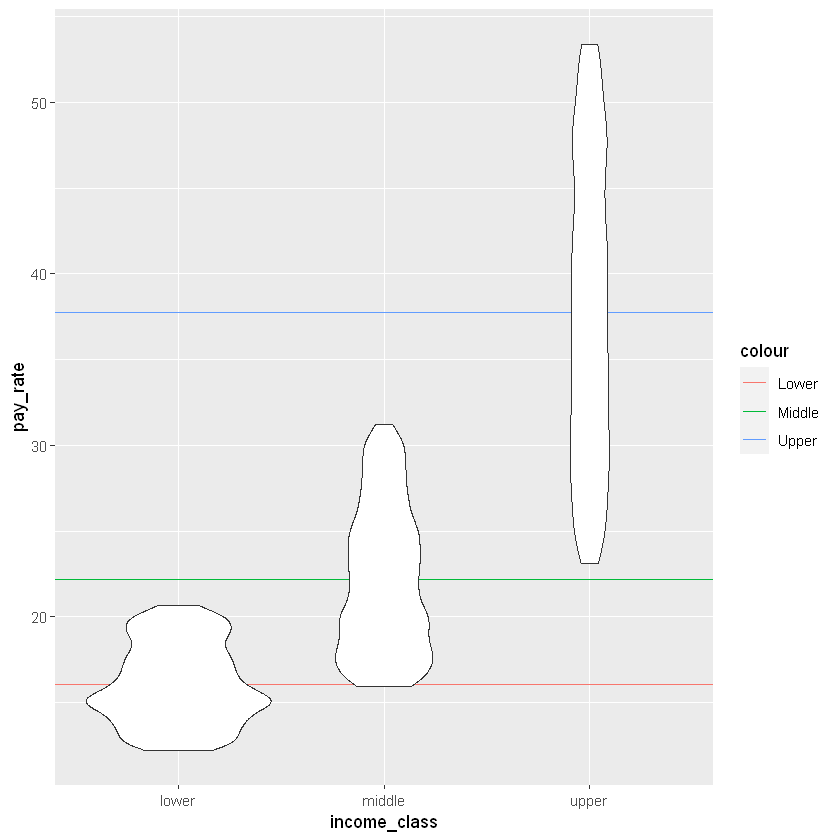

In [109]:


worthless_box  <- ggplot(data = hhpp_normal_payrate, aes(pay_rate, x = income_class)) + 
                    geom_hline(aes(yintercept = base, color = "Lower")) +
                    geom_hline(aes(yintercept = middle, color = "Middle")) +
                    geom_hline(aes(yintercept = upper, color = "Upper")) +
                    geom_violin(scale = "area")

worthless_box

# draw a line for each average pay rate

The answer here is clear: if you make less money, your work is worth less. The less money you make, the less you are worth.

However, this model fails to account for several things, one of the most important being the nonlinear relationship between pay rate and the amount of money one makes.

In [110]:
names(hhpp_normal_payrate)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

In [111]:
# Control for hours worked
hhpp_normal_payrate_20hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "20")

hhpp_normal_payrate_30hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "30")

hhpp_normal_payrate_40hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "40")

hhpp_normal_payrate_50hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "50")

hhpp_normal_payrate_60hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "60")

summary(hhpp_normal_payrate_40hrs$hours_week)

glm_payrate  <- glm(pay_rate ~ income_class, data = hhpp_normal_payrate_40hrs, Gamma(link ="identity"))
summary(glm_payrate)

glm_income  <- glm(income_week ~ income_class, data = hhpp_normal_payrate_40hrs, Gamma(link ="identity"))
summary(glm_income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     40      40      40      40      40      40 


Call:
glm(formula = pay_rate ~ income_class, family = Gamma(link = "identity"), 
    data = hhpp_normal_payrate_40hrs)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         16.1997     0.1440  112.47   <2e-16 ***
income_classmiddle   5.9769     0.1749   34.18   <2e-16 ***
income_classupper   21.5191     0.2901   74.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.03739202)

    Null deviance: 385.79  on 3181  degrees of freedom
Residual deviance: 119.73  on 3179  degrees of freedom
AIC: 18818

Number of Fisher Scoring iterations: 3



Call:
glm(formula = income_week ~ income_class, family = Gamma(link = "identity"), 
    data = hhpp_normal_payrate_40hrs)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         647.989      5.761  112.47   <2e-16 ***
income_classmiddle  239.078      6.995   34.18   <2e-16 ***
income_classupper   860.763     11.604   74.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.03739202)

    Null deviance: 385.79  on 3181  degrees of freedom
Residual deviance: 119.73  on 3179  degrees of freedom
AIC: 42294

Number of Fisher Scoring iterations: 3


In [112]:
linc_40hrs  <- hhpp_normal_payrate_40hrs %>%
    filter(income_class == "lower")

summary(linc_40hrs$income_week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    489     577     640     648     720     827 

In [113]:
summary(hhpp_normal_payrate_40hrs$income_class)

all_classes  <-  474 + 1870 + 839 
lower_prop  <- 474/all_classes
lower_prop
#sum(hhpp_normal_payrate_40hrs$income_class)

lower middle  upper 
   473   1870    839

[1] 0.1489161

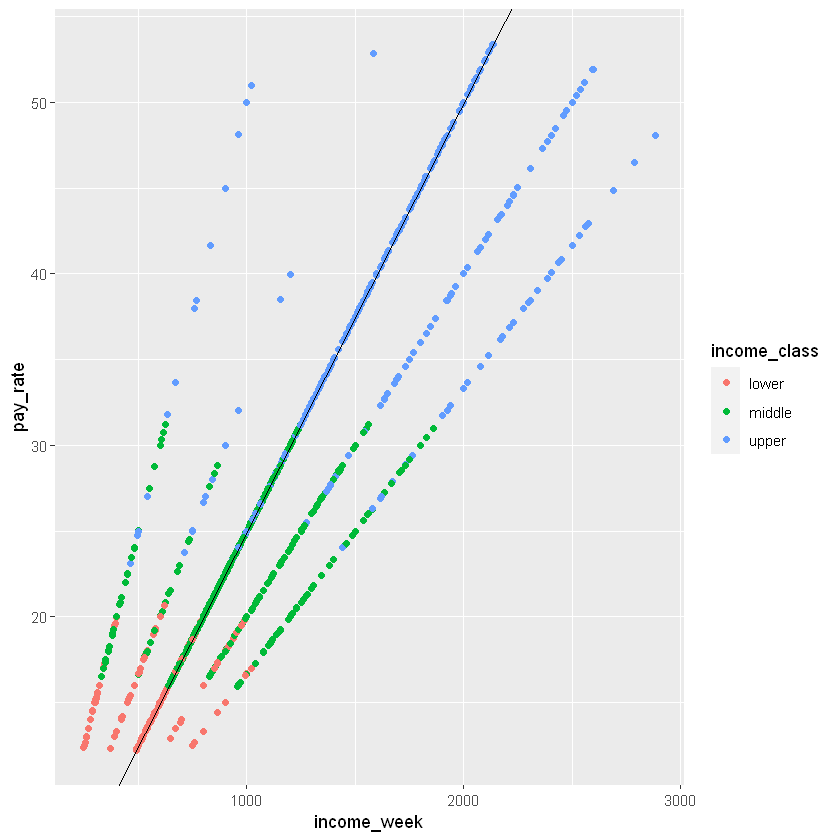

In [114]:
gg_worthless_20.60  <- ggplot(data = hhpp_normal_payrate_40hrs, aes(y = pay_rate, x = income_week)) +
                    geom_jitter(height = 0, width = 0, aes(color = income_class)) +
                    geom_abline(aes(intercept=0, slope=.025)) +
                    geom_jitter(data = hhpp_normal_payrate_50hrs, aes(y = pay_rate, x = income_week, color = income_class)) +
                    geom_jitter(data = hhpp_normal_payrate_60hrs, aes(y = pay_rate, x = income_week, color = income_class)) +
                    geom_jitter(data = hhpp_normal_payrate_20hrs, aes(y = pay_rate, x = income_week, color = income_class)) +
                    geom_jitter(data = hhpp_normal_payrate_30hrs, aes(y = pay_rate, x = income_week, color = income_class))

gg_worthless_20.60 

Controlling for the same number of hours worked, the relationship of pay rate to income per week is linear. Because it is linear, the less money you make, the less you are compensated for your labor. This relationship cannot be changed unless you make more money. Therefore, the only way the lower classes can be compensated more for their labor is by paradoxiacally making more money and entering the ranks of the middle classes. As we have discussed, the likelihood of this is low because income mobility is, on average, 5.6% (according to a study by the Brookings Institute).

# The Education Factor

The Great British Class Survey builds on preexisting research on European economic classes. Overall, the European literature appears to have a preponderance of left-leaning economic and social class analysis over the US literature. At least, the European literature seems to be more up-front about these factors. I suspect this is in part due to the lingering impact of red scare propaganda and successful barbarization of communism in the Unites States, which predisposes even academic circles to distance themselves from left-leaning class analysis. It cannot be neglected that the United States functions as an empire, with various tributary states with no political representation (Puerto Rico, Guam, etc.) and other states which the United States controls through economic means, with the threat of military coercion and soft power influence always apparent, ensuring the United States gets the lion's share of profits from most enterprises involving resource extraction, including labor extraction, where labor extraction is defined as the labor in those countries is cheaper, and is largely used to benefit trade networks that result in profits for the American patrician class, i.e. the limited number of people with sufficient capital to exert influence over the functioning of American industries and the actions of the government. The most globaly-inflluential industries, not by coincidence, are those of war and international banking, both which back and reinforce the ultimate power of the American dollar. 

That is to say that the current mystification of class is inseparable from the American empire. One theory may be that this obfuscation may be seen as an optimal way to prevent rank and file Americans from recognizing the despicable actions required to maintain any empire.

A more useful component of its application at home is to prevent people in the lower and middle classes from recognizing the sheer level of disparity between them and the upper-income class. The upper-income class is in turn also robbed of a tool which would inform them that they, too, are levels of magnitude away from the ruling elite, our patrician class.

This is not to say that Americans do not have a concept of the level of division; especially as income inequality rises, the disparity is impossible not to see.

Above all, these classes are kept complacent through readily-available mass consumption of goods and services. And the degree to which these goods are available is so great due to the power and influence of the American empire.

Europeans, for various reasons, have adopted more left-wing economic and social policies. The application of left-wing principles is inherent to their application, and that drum continues to be hammered on by the efforts in labor unions accross Europe.

European coutries and the USA are capitalist representative democracies in the Western core of the American empire, with a good degree of cultural exchange and shared cultural heritage. Therefore, it is not unreasonable to apply European economic research to the United States. But, because the goals of any given European country and academic bias of any given research institution, the particular details of implementation, as well as the class makeup, is different enough to warrant a level of caution when applying European metrics to the USA.

One finding of European research on class, which is not independent from the American tradition of research on class, is that classes exist on social as well as economic levels. The Great British Class Survey considers the 3 separate vectors of economic, social, and cultural status signifiers.

One of the vectors that makes up social status is education, and it is theorized that the level of one's education is related to whether one is in the lower, middle, or upper social class.

In this case, we will first examine the interplay of the social status signifier of education and the economic status signifier of pay rate.

In [115]:
levels(hhpp_normal_payrate$education_level)
#education_level

#summary(hhpp_normal_payrate)

[1] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[16] "46"

$f(x) = \text{pay rate}$

$X_i = \text{education, where } i \text{ represents level of education}$

$f(x) = \beta_{0} + \beta_{i1}X_{i1} ... \beta_{i15}X_{i15} +\epsilon_{i} $

Where $x_i$ is the baseline, in this case less than a 1st grade education. $x_{i1}$ represents a 1st through 4th grade education. There are 16 levels of x; if the first level of x is 0, then the $k$th level of x is represented by $x_{i15}$.

Based on the results of Hypothesis 1, we have been able to show a powerful relationship between pay rate and economic status; furthermore, we are aware that the relationship of economic status to pay rate divides it into 3 well-defined classes with some overlap. That is to say that we already know a model that purely uses education level to determine pay rate is not giving us the full story, because at least one of the chapters of that story (and an impactful one at that - perhaps the only one a professor would assign to briefly cover the matter) is that of economic class.

So the results of this initial model must be considered in light of what we already know about pay rates: they can be largely explained by economic class.

In order to understand the generalized relationship in terms of education, it is important to visualise and quantify this particular variable, so we can compare its influence alone to its influence when combined with the variable of economic class.

In [116]:
hhpp_education  <- hhpp_normal_payrate

hhpp_education$education_level <- recode_factor(hhpp_education$education_level, "31" = "sub_gs",
                                                "32" = "1.4",  "33" = "5.6", "34" = "7.8", 
                                                "35" = "9", "36" = "10", "37" = "11", "38" = "12",
                                               "39" = "hs", "40" = "c_some", "41" = "c_a_occ.voc", "42" = "c_a_acad",
                                               "43" = "c_b", "44" = "c_m", "45" = "prof", "46" = "c_d")

levels(hhpp_education$education_level)

[1] "sub_gs"      "1.4"         "5.6"         "7.8"         "9"          
 [6] "10"          "11"          "12"          "hs"          "c_some"     
[11] "c_a_occ.voc" "c_a_acad"    "c_b"         "c_m"         "prof"       
[16] "c_d"

In [117]:
names(hhpp_education)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

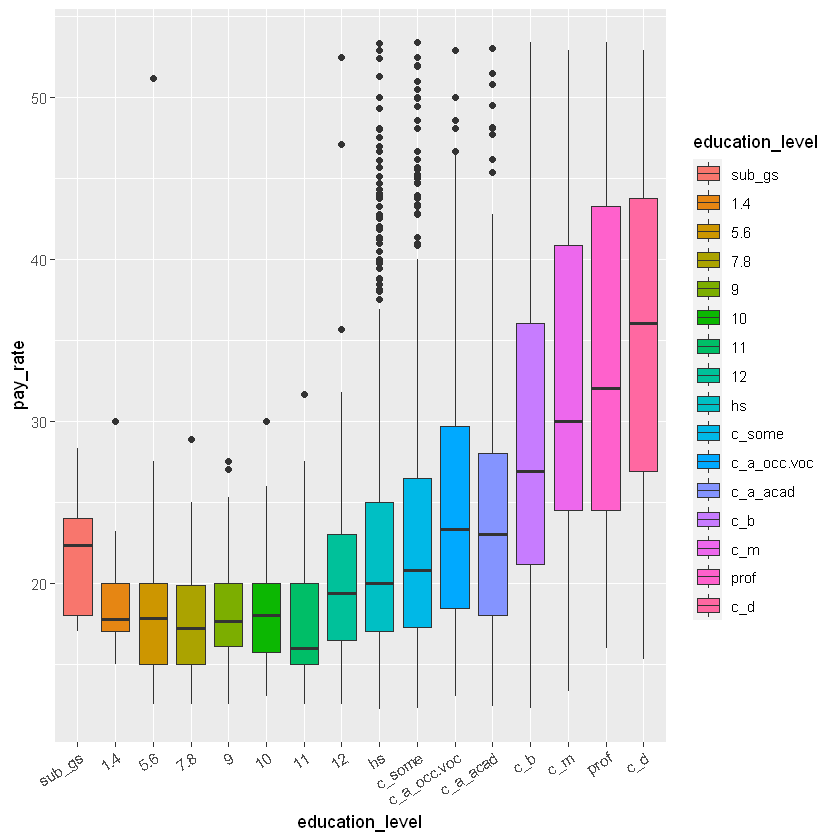

In [118]:
# gg_adj_box  <- ggplot(hhpp_education, aes(pay_rate, x =income_class)) + geom_boxplot()
# gg_adj_box + facet_grid(cols =vars(education_level)) + labs(title = "Education")

gg_payrate_edu  <- ggplot(hhpp_education, aes(pay_rate, x = education_level))
gg_payrate_edu  <- gg_payrate_edu +
geom_boxplot(aes(fill = education_level)) +
theme(axis.text.x = element_text(angle = 33, vjust = 1.0, hjust=1))

gg_payrate_edu

This box plot shows the distribution of pay rate (y) across different levels of education. As one can see, there is a general upward arc as increased academic achievement is obtained.

However, starting from high school, the standard deviation of pay rate increases drastically, and a broad range of pay rates for income level start to form.

Clearly, there is a nonlinear relationship between education and pay rate, especially as education level increases. One would expect the higher levels of education to have similar pay rates, and for the relationship to no longer increase as drastically, as some of the upper levels of education may have similar effects beyond a certain inflection point, that point most likely being high school. 

It may help to visualise these groupings in a more nonlinear fashion.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


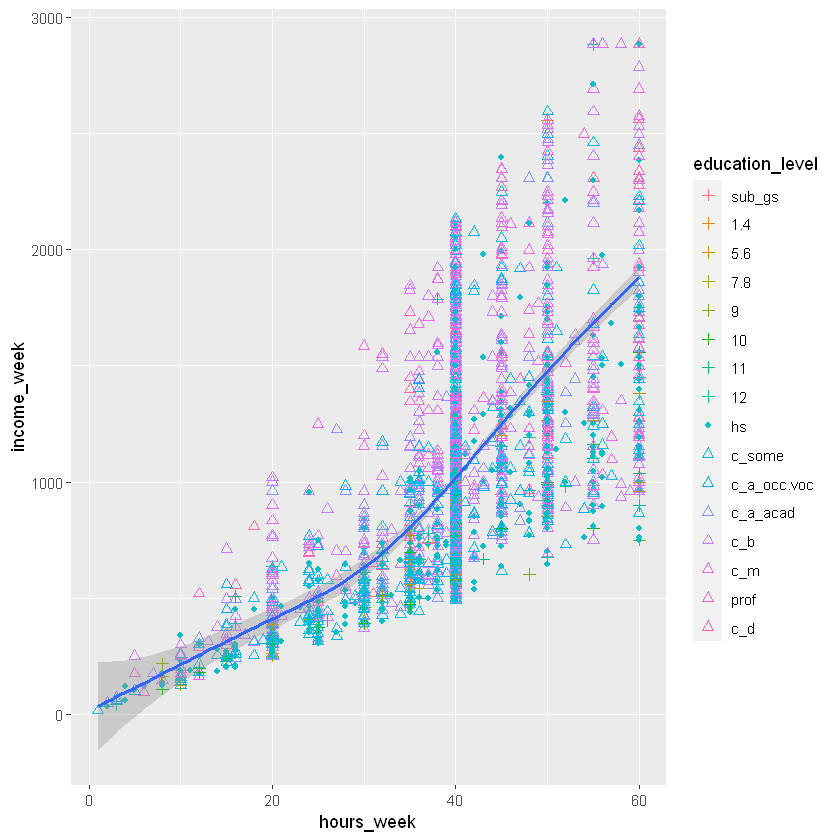

In [119]:
#[Previous] graph [was] confusing. Hard to tell detail. Attemping amendment by reducing upper range of 
#weekly hours worked. Starting with cap at k = 60.

hhpp_education_disp  <- hhpp_education %>%
    filter(hours_week <= 60)


gg_edu  <- ggplot(data = hhpp_education_disp, aes(y =income_week, hours_week)) + 
geom_point(size = 2, alpha = 1, aes(shape = education_level, color = education_level)) + 
scale_shape_manual(values=c(3, 3, 3, 3, 3, 3, 3, 3, 20, 2, 2, 2, 2, 2, 2, 2)) +
geom_smooth()

gg_edu 

People with no grade school - grade school primarily dominate the bottom range of the pay rate spectrum. They are mostly under the line of best fit.

The same appears to be true for high schoolers, who are also mostly below the line of best fit.

The triangles represent any level of higher education; they primarily dominate the upper range, being above the line of best fit.

The line of best fit tells us a few things about the relationship between weekly income and weekly hours worked, which are useful to bear in mind. The line has a more gentle slope when the $k$ for hours worked per week is <30. At around $x = 30$, the line begins to change to a steeper slope that governs the relationship between those who work more than ~30 hours a week and their pay. 

As noted before, people with an education level below grade school are outliers in the data, which makes interpreting the model coefficients needlessly painful. Therefore, they will be filtered out of the data with the intention of creating a more interpretable model.

In [120]:
glm_payrate  <- glm(pay_rate ~ 1, data = hhpp_education, family = Gamma(link ="inverse"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ 1, family = Gamma(link = "inverse"), 
    data = hhpp_education)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0389288  0.0002084   186.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.1446647)

    Null deviance: 650.61  on 5047  degrees of freedom
Residual deviance: 650.61  on 5047  degrees of freedom
AIC: 36217

Number of Fisher Scoring iterations: 5


In [121]:
glm_payrate  <- glm(pay_rate ~ education_level, data = hhpp_education, family = Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level, family = Gamma(link = "identity"), 
    data = hhpp_education)

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                21.93000    3.28137   6.683 2.59e-11 ***
education_level1.4         -2.81750    3.76497  -0.748 0.454287    
education_level5.6         -3.12471    3.42534  -0.912 0.361689    
education_level7.8         -4.00121    3.44846  -1.160 0.245986    
education_level9           -3.35087    3.42902  -0.977 0.328513    
education_level10          -3.58615    3.39205  -1.057 0.290460    
education_level11          -4.04190    3.38670  -1.193 0.232744    
education_level12          -1.10260    3.39861  -0.324 0.745629    
education_levelhs          -0.09953    3.28725  -0.030 0.975848    
education_levelc_some       1.28397    3.29350   0.390 0.696665    
education_levelc_a_occ.voc  3.39729    3.32609   1.021 0.307111    
education_levelc_a_acad     2.22517    3.30823   0.673 0.

A few things are apparent here:

The average pay rate across all income groups starts at 19.11 (+-1.84.) times how much they work, which is significantly skewed towards the upper classes (t = 7.55, p < 0.001). The $k$ for the baseline is people with a 1st through 4th grade education, and n = 12. In this case, it is safe to assume the baseline is an unreliable estimate that cannot be used to make any arguent about the true standing of 1st through 4th graders. It is, however, given the relatively reasonable standard error, not completely unreliable.

The baseline is required to interpret the rest of the model, and I am inclined to keep it in order to not lose detail on the granular differences between grades.

However, the n of other categories of interest is higher, so I am more inclined to believe them. 

All levels of higher education seem to significantly explain the pay rates of those with an above high-school education, with the magnitude of difference increasing, and the highest average pay rates being enjoyed by those with doctorates.

Now that we understand the general relationship between these levels of education and income, the time has come to introduce economic class to our model.

Before we do that, it would be wise to consider the relationship of pay rate to education level for each level of economic class, to see how they differ.

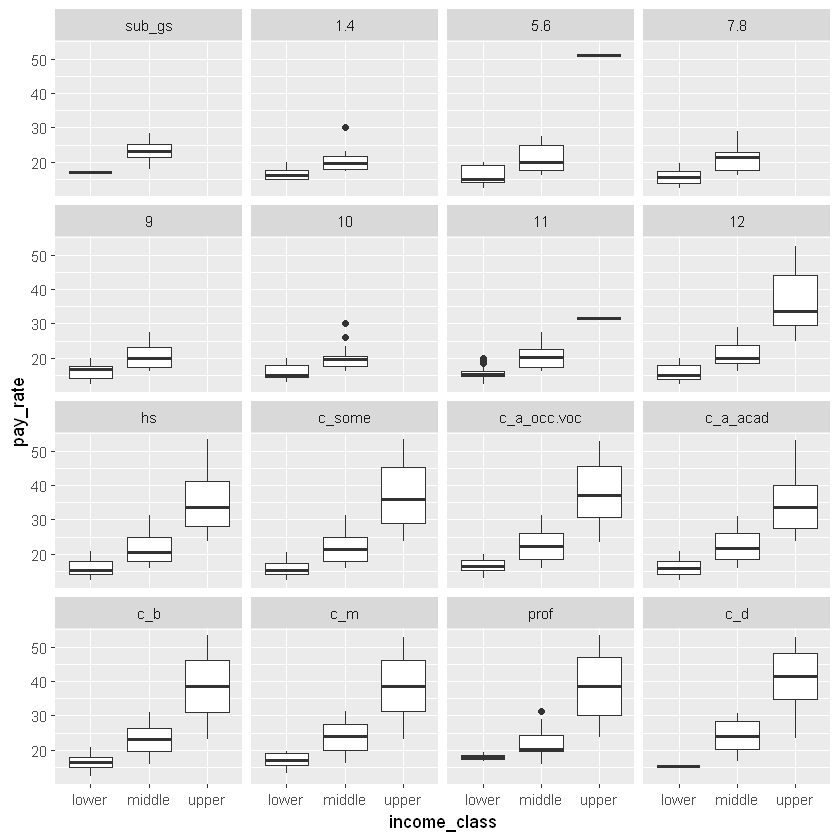

In [122]:
gg_payrate_edu_hhincome  <- ggplot(hhpp_education, aes(y = pay_rate, x = income_class)) +
                            geom_boxplot() +
                            facet_wrap(vars(education_level))

gg_payrate_edu_hhincome



In [123]:
glm_payrate  <- glm(pay_rate ~ education_level + income_class, data = hhpp_education, family = Gamma(link ="identity"))
summary(glm_payrate)
attributes(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level + income_class, family = Gamma(link = "identity"), 
    data = hhpp_education)

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                17.32803    1.86070   9.313   <2e-16 ***
education_level1.4         -1.28763    2.13316  -0.604    0.546    
education_level5.6         -1.30688    1.93532  -0.675    0.500    
education_level7.8         -1.82853    1.95184  -0.937    0.349    
education_level9           -1.77397    1.94157  -0.914    0.361    
education_level10          -2.12225    1.92076  -1.105    0.269    
education_level11          -1.90687    1.91698  -0.995    0.320    
education_level12          -1.70398    1.91767  -0.889    0.374    
education_levelhs          -1.56142    1.86115  -0.839    0.402    
education_levelc_some      -1.35212    1.86407  -0.725    0.468    
education_levelc_a_occ.voc -0.38869    1.88037  -0.207    0.836    
education_levelc_a_acad    -0.91506    1.8

$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

And now the demon rears its ugly head. The coefficients for the education levels are calculated for the lower class. To get the corresponding coefficients for the upper class, we add the pay rate estimates for middle class people or upper class people to the corresponding level of education. So, for any given level of education, a middle class person will be rewarded with a pay rate that is the intercept term + however much a lower-class person would have made in that position + 5.69.

These previous model suffers from a major flaw: namely, it does not control for many things, one of the most important being hours worked/week.

### Pay Rate ~ Education | Controlling for Income, 30hrs

In [124]:
#hhpp_normal_payrate_30hrs

glm_payrate  <- glm(pay_rate ~ education_level + income_class, data = hhpp_normal_payrate_30hrs, family = Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level + income_class, family = Gamma(link = "identity"), 
    data = hhpp_normal_payrate_30hrs)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        17.00000    2.82383   6.020 5.18e-08 ***
education_level33  -2.00000    3.76592  -0.531   0.5969    
education_level34  -4.00000    3.55485  -1.125   0.2639    
education_level36  -2.85000    3.27662  -0.870   0.3870    
education_level37  -0.80396    3.09053  -0.260   0.7954    
education_level38  -2.16573    4.33043  -0.500   0.6184    
education_level39  -1.61927    2.89975  -0.558   0.5781    
education_level40  -2.03325    2.89885  -0.701   0.4851    
education_level41   0.13333    3.46753   0.038   0.9694    
education_level42  -0.22127    3.05237  -0.072   0.9424    
education_level43   0.05738    2.95805   0.019   0.9846    
education_level44   9.08711    4.50873   2.015   0.0473 *  
education_level45   2.23333    4.26389   0.524   0.6019    
educati

### Pay Rate ~ Education | Controlling for Income, 40hrs

In [125]:
glm_payrate  <- glm(pay_rate ~ education_level + income_class, data = hhpp_normal_payrate_40hrs, family = Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level + income_class, family = Gamma(link = "identity"), 
    data = hhpp_normal_payrate_40hrs)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        15.91834    2.37213   6.711 2.29e-11 ***
education_level32   0.32233    2.61181   0.123    0.902    
education_level33  -0.16270    2.45734  -0.066    0.947    
education_level34  -0.11622    2.46551  -0.047    0.962    
education_level35  -0.29128    2.44660  -0.119    0.905    
education_level36  -0.01973    2.44706  -0.008    0.994    
education_level37  -0.79628    2.44474  -0.326    0.745    
education_level38  -0.13878    2.44605  -0.057    0.955    
education_level39  -0.05527    2.36959  -0.023    0.981    
education_level40   0.42493    2.37350   0.179    0.858    
education_level41   1.76971    2.39866   0.738    0.461    
education_level42   0.65679    2.38190   0.276    0.783    
education_level43   1.53230    2.37231   0.646    0.518    
educati

### Pay Rate ~ Education | Controlling for Income, 50hrs

In [126]:
glm_payrate  <- glm(pay_rate ~ education_level + income_class, data = hhpp_normal_payrate_50hrs, family = Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level + income_class, family = Gamma(link = "identity"), 
    data = hhpp_normal_payrate_50hrs)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         22.4781     5.3469   4.204 3.42e-05 ***
education_level33    1.9911     7.0503   0.282    0.778    
education_level35   -4.5790     5.9429  -0.771    0.442    
education_level36   -8.3000     6.4716  -1.283    0.201    
education_level37   -2.7864     5.7907  -0.481    0.631    
education_level38   -5.4107     5.6841  -0.952    0.342    
education_level39   -5.3834     5.3138  -1.013    0.312    
education_level40   -4.6259     5.3328  -0.867    0.386    
education_level41   -4.5246     5.5193  -0.820    0.413    
education_level42   -4.4716     5.4068  -0.827    0.409    
education_level43   -3.8220     5.3223  -0.718    0.473    
education_level44   -4.5205     5.3429  -0.846    0.398    
education_level45   -1.6834     5.6455  -0.298    0.766    
educati

It would appear that, once the hours one works a week are held constant, the impact of one's education is marginal compared to one's class.

It may behoove us to control for class as well, since clearly it is such a powerful explainer that it reduces our ability to make assumptions about the relation of education to pay rate.

The answer, however, is clear: when the poor, middle, and upper classes are compared, the econmic status of their class dominates and minimizes whatever benefits they may receive through education. It is worth again noting that household income is a tricky thing here; it is, after all, the household income on the same year this survey was administered, biasing the model towards these findings. I am again inclined to remind the reader that income class is a categorical variable, and that more importantly, income mobility is low in the United States, so there is a high likelihood that an individual in the lower class today was also in the lower class 10 years ago.

In [127]:
lower_income_edu  <- hhpp_normal_payrate %>%
    filter(income_class == c('lower'))

middle_income_edu  <- hhpp_normal_payrate %>%
    filter(income_class == c('middle'))

upper_income_edu  <- hhpp_normal_payrate %>%
    filter(income_class == c('upper'))

### Pay Rate ~ Education | Holding Lower Class Constant

In [128]:
glm_payrate  <- glm(pay_rate ~ education_level, data = lower_income_edu, family = Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level, family = Gamma(link = "identity"), 
    data = lower_income_edu)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        17.0000     2.4598   6.911 9.96e-12 ***
education_level32  -0.2500     2.6880  -0.093    0.926    
education_level33  -0.9229     2.5034  -0.369    0.712    
education_level34  -1.3778     2.5168  -0.547    0.584    
education_level35  -0.9567     2.5234  -0.379    0.705    
education_level36  -1.2232     2.5097  -0.487    0.626    
education_level37  -1.3624     2.4942  -0.546    0.585    
education_level38  -1.2587     2.5095  -0.502    0.616    
education_level39  -1.0511     2.4632  -0.427    0.670    
education_level40  -1.1169     2.4665  -0.453    0.651    
education_level41  -0.1362     2.4973  -0.055    0.957    
education_level42  -0.8441     2.4799  -0.340    0.734    
education_level43  -0.4876     2.4739  -0.197    0.844    
education_level44  -0.0197     2.5459  -0.008

### Pay Rate ~ Education | Holding Middle Class Constant

In [129]:
glm_payrate  <- glm(pay_rate ~ education_level, data = middle_income_edu, family = Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level, family = Gamma(link = "identity"), 
    data = middle_income_edu)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        23.1625     2.1696  10.676   <2e-16 ***
education_level32  -2.3625     2.6223  -0.901    0.368    
education_level33  -1.9673     2.3997  -0.820    0.412    
education_level34  -2.2681     2.4087  -0.942    0.346    
education_level35  -2.6239     2.3195  -1.131    0.258    
education_level36  -3.0217     2.2764  -1.327    0.184    
education_level37  -2.5854     2.3346  -1.107    0.268    
education_level38  -2.0177     2.2706  -0.889    0.374    
education_level39  -1.7352     2.1738  -0.798    0.425    
education_level40  -1.4694     2.1779  -0.675    0.500    
education_level41  -0.4713     2.1965  -0.215    0.830    
education_level42  -0.6468     2.1871  -0.296    0.767    
education_level43  -0.1546     2.1762  -0.071    0.943    
education_level44   0.6128     2.1913   0.28

### Pay Rate ~ Education | Holding Upper Class Constant

In [130]:
glm_payrate  <- glm(pay_rate ~ education_level, data = upper_income_edu, family = Gamma(link ="identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level, family = Gamma(link = "identity"), 
    data = upper_income_edu)

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)          51.16      11.53   4.436 9.85e-06 ***
education_level37   -19.54      13.56  -1.441    0.150    
education_level38   -14.38      12.02  -1.197    0.232    
education_level39   -16.24      11.55  -1.406    0.160    
education_level40   -14.37      11.55  -1.244    0.214    
education_level41   -13.96      11.59  -1.205    0.228    
education_level42   -16.71      11.56  -1.445    0.149    
education_level43   -12.97      11.54  -1.124    0.261    
education_level44   -12.33      11.54  -1.068    0.286    
education_level45   -12.16      11.61  -1.047    0.295    
education_level46   -10.31      11.59  -0.890    0.374    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.05081135)

    Null deviance: 78.439  on 1

The idea that education influences pay rate is, once one controls for one's current economic class, fictional. Once class is held constant, that reality becomes clear: there is no significant relationship between level of education and your pay rate.

This conclusion is premature without analyzing the particular degrees and institutions that may be more likely to render higher salaries.

However, for the broad American population - the population at large, and on average: upward mobility through education is somewhat like the ability of American people to influence major policy changes. For most people, it is a myth.

Now, as the Romans spun myths largely aggrandizing and justifying themselves, so do the United States...ians. And if Rome was constructed for Romans, with the welfare of their slaves and plebians being very much a minor concern, so too was the United States constructed for white people, with the welfare of their slaves (at the time) and working poor being nowhere near a priority.

So naturally, if the myth of the United States is true at all, than it should at least be true for white people in the middle and upper economic classes.

In [131]:
names(hhpp_normal_payrate)

summary(hhpp_normal_payrate$race)

hhpp_normal_payrate_white  <- hhpp_normal_payrate %>%
    filter(race == 1)

dim(hhpp_normal_payrate_white)

glm_payrate_race  <- glm(pay_rate ~ education_level + income_class, data = hhpp_normal_payrate_white, family = Gamma(link ="identity"))
summary(glm_payrate_race)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

1    2    3    4    5    6    7    8    9   10   11   12   13   15   16   18 
4084  526   70  262   21   38   13   19    2    1    2    1    1    2    4    1 
  19   21   26 
   0    1    0

[1] 4084   18


Call:
glm(formula = pay_rate ~ education_level + income_class, family = Gamma(link = "identity"), 
    data = hhpp_normal_payrate_white)

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         18.4021     2.1664   8.494   <2e-16 ***
education_level32   -1.9076     2.5141  -0.759    0.448    
education_level33   -2.4002     2.2390  -1.072    0.284    
education_level34   -2.8104     2.2486  -1.250    0.211    
education_level35   -3.3159     2.2459  -1.476    0.140    
education_level36   -3.4399     2.2263  -1.545    0.122    
education_level37   -2.9912     2.2307  -1.341    0.180    
education_level38   -3.3448     2.2281  -1.501    0.133    
education_level39   -2.5739     2.1673  -1.188    0.235    
education_level40   -2.4047     2.1704  -1.108    0.268    
education_level41   -1.6142     2.1865  -0.738    0.460    
education_level42   -1.6803     2.1805  -0.771    0.441    
education_level43   -1.0789     2.1705  -0.497    0.619    
educati

In [132]:
names(hhpp_education)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "full_time"      
[13] "part_time"       "pay_rate"        "hh_income"       "hh_persons"     
[17] "income_adj"      "income_class"

In [133]:
glm_payrate  <- glm(pay_rate ~ education_level:income_class + income_class, data = hhpp_education, family = Gamma("identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ education_level:income_class + income_class, 
    family = Gamma("identity"), data = hhpp_education)

Coefficients: (5 not defined because of singularities)
                                              Estimate Std. Error t value
(Intercept)                                    17.0000     3.2885   5.170
income_classmiddle                              6.1625     3.9790   1.549
income_classupper                              23.8474     3.4272   6.958
education_level1.4:income_classlower           -0.2500     3.5935  -0.070
education_level5.6:income_classlower           -0.9229     3.3468  -0.276
education_level7.8:income_classlower           -1.3778     3.3647  -0.409
education_level9:income_classlower             -0.9567     3.3735  -0.284
education_level10:income_classlower            -1.2232     3.3552  -0.365
education_level11:income_classlower            -1.3624     3.3345  -0.409
education_level12:income_classlower            -1.2587     3.3549  -0.3

In [134]:
glm_payrate  <- glm(pay_rate ~ income_class:education_level + income_class, data = hhpp_normal_payrate_30hrs, family = Gamma("identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ income_class:education_level + income_class, 
    family = Gamma("identity"), data = hhpp_normal_payrate_30hrs)

Coefficients: (18 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           17.0000     2.6010   6.536 8.23e-09 ***
income_classmiddle                     7.5000     4.5625   1.644 0.104631    
income_classupper                     28.6667     5.5834   5.134 2.38e-06 ***
income_classlower:education_level33   -2.0000     3.4687  -0.577 0.566048    
income_classmiddle:education_level33       NA         NA      NA       NA    
income_classupper:education_level33        NA         NA      NA       NA    
income_classlower:education_level34   -4.0000     3.2743  -1.222 0.225891    
income_classmiddle:education_level34       NA         NA      NA       NA    
income_classupper:education_level34        NA         NA      NA       NA    
income_classlower:e

In [135]:
glm_payrate  <- glm(pay_rate ~ income_class:education_level + income_class, data = hhpp_normal_payrate_40hrs, family = Gamma("identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ income_class:education_level + income_class, 
    family = Gamma("identity"), data = hhpp_normal_payrate_40hrs)

Coefficients: (10 not defined because of singularities)
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           17.07778    1.08512  15.738  < 2e-16 ***
income_classmiddle                     4.37222    2.59812   1.683  0.09250 .  
income_classupper                     22.09633    1.78016  12.413  < 2e-16 ***
income_classlower:education_level32    0.10972    1.96493   0.056  0.95547    
income_classmiddle:education_level32  -0.65000    2.79615  -0.232  0.81619    
income_classupper:education_level32         NA         NA      NA       NA    
income_classlower:education_level33   -1.37778    1.30550  -1.055  0.29134    
income_classmiddle:education_level33   0.05313    2.76999   0.019  0.98470    
income_classupper:education_level33         NA         NA      NA       NA    
income_cl

In [136]:
glm_payrate  <- glm(pay_rate ~ income_class:education_level + income_class, data = hhpp_normal_payrate_50hrs, family = Gamma("identity"))
summary(glm_payrate)


Call:
glm(formula = pay_rate ~ income_class:education_level + income_class, 
    family = Gamma("identity"), data = hhpp_normal_payrate_50hrs)

Coefficients: (12 not defined because of singularities)
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           17.1500     1.5899  10.787  < 2e-16 ***
income_classmiddle                    11.1500     5.4826   2.034   0.0429 *  
income_classupper                     19.8700     3.7823   5.253 2.82e-07 ***
income_classlower:education_level33        NA         NA      NA       NA    
income_classmiddle:education_level33  -1.3800     7.2417  -0.191   0.8490    
income_classupper:education_level33   14.1400    10.0872   1.402   0.1620    
income_classlower:education_level35   -0.1500     3.5302  -0.042   0.9661    
income_classmiddle:education_level35  -3.0000     7.0381  -0.426   0.6702    
income_classupper:education_level35        NA         NA      NA       NA    
income_classlower:e

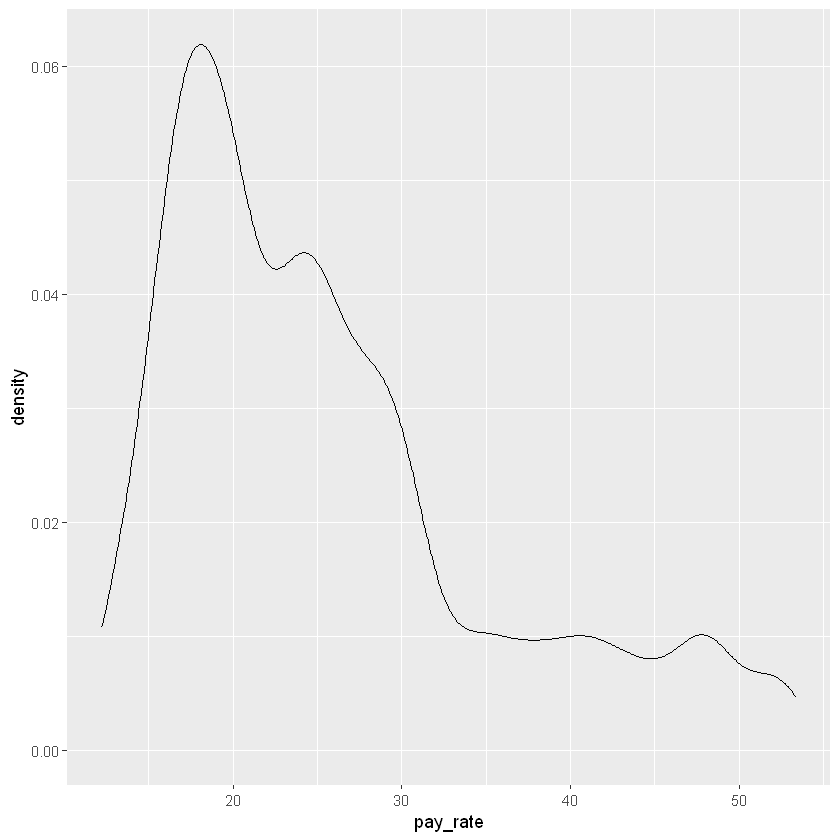

In [137]:
ggplot(data = hhpp_normal_payrate, aes(pay_rate)) + geom_density()

In [138]:
install.packages("lme4")
library(lme4)

Installing package into 'C:/Users/roman/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roman\AppData\Local\Temp\RtmpuynBwN\downloaded_packages


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




In [139]:
# Random intercepts and slopes across subjects
# me.fit1 = lmer(pay_rate ~ education_level + (education_level | income_class), data=hhpp_education)
# # ^^ the same as me.fit1 = lmer(Reaction ~ Days +  (1+Days | Subject), data=sleepstudy) 
# summary(me.fit1)
# # Random intercepts only
# me.fit2 = lmer(Reaction ~ Days + (1 | Subject), data=sleepstudy)

# print("*******me.fit1********")
# summary(me.fit1)

# print("*******me.fit2********")
# summary(me.fit2)